# Project - House Prices Prediction

# Introduction

## Problem Statement

To assist potential house owner, house investors or property agents to find out key variables that will affect the price of homes for the Ames Iowa Housing

- The key idea is to find out what are the key variables to collect for valuation of the houses.
- The original dataset contains 80 features describing the house. 
- The most important features that determine the Sale Price: Living Area Above Gound, The Neighbourhood, The Overall (Quality and Condition) of the house, The Garage Score(Garage Finish, Garage Cars and Garage Area) and followed by The Basement Score (Types of Finishes on the Basement, The Square Footage and The Quality)
- We will be using Linear Regression, Ridge, Lasso, Elastic Net Models which will be evaluated using R^2  and RMSE metrics.

### Target Audience

We are group of property valuators, specialising in valuating property prices in the City of Ames. Be it potential house owner, house investors or property agents, using this tool will ensure that the buyers and sellers receives fair valuation on the house based on the required variables. This will also allow them to know the key indicators that will affect the valuation of the houses.

### Datasets

- There are two datasets train.csv which will be used to build our model and test.csv which will be used solely on getting a prediction with our model.
- There are total of 81 columns in the train.csv file which includes the SalePrice and 80 columns in the test.csv file which does not have the SalePrice column.
- The data dictionary for the datasets could be found [here.](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

# Train Data

## Importing Libraries and train data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from math import sqrt
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
sns.set_theme()

In [2]:
hse = pd.read_csv('datasets/train.csv')
print(hse.shape)
hse.head()

(2051, 81)


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [3]:
hse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Preliminary EDA

There seems to be 'Missing datas' in the following columns, however as per the Data Dictionary, most have NA as a response rather than missing data.
1. 'Lot Frontage'
2. 'Alley', 
3. 'Mas Vnr Type', 
4. 'Mas Vnr Area'
5. 'Bsmt Qual'
6. 'Bsmt Cond'
7. 'Bsmt Exposure'
8. 'BsmtFin Type 1'
9. 'BsmtFin SF 1'
10. 'BsmtFin Type 2'
11. 'BsmtFin SF 2'
12. 'Bsmt Unf SF'
13. 'Total Bsmt SF'
14. 'Bsmt Full Bath'
15. 'Bsmt Half Bath'
16. 'Fireplace Qu'
17. 'Garage Type'
18. 'Garage Yr Blt'
19. 'Garage Finish'
20. 'Garage Cars'
21. 'Garage Area'
22. 'Garage Qual'
23. 'Garage Cond'
24. 'Pool QC'
25. 'Fence'
26. 'Misc Feature'


In [4]:
# Percentage of isna() in the columns
hse.isna().sum().sort_values(ascending=False)/len(hse)*100

Pool QC         99.561190
Misc Feature    96.830814
Alley           93.174061
Fence           80.497318
Fireplace Qu    48.756704
                  ...    
Heating QC       0.000000
Central Air      0.000000
Electrical       0.000000
1st Flr SF       0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [5]:
hse['BsmtFin SF 1'].isna().sort_values(ascending=False)

1327     True
0       False
1347    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: BsmtFin SF 1, Length: 2051, dtype: bool

In [6]:
hse['BsmtFin SF 2'].isna().sort_values(ascending=False)

1327     True
0       False
1347    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: BsmtFin SF 2, Length: 2051, dtype: bool

In [7]:
hse['Bsmt Unf SF'].isna().sort_values(ascending=False)

1327     True
0       False
1347    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: Bsmt Unf SF, Length: 2051, dtype: bool

In [8]:
hse['Total Bsmt SF'].isna().sort_values(ascending=False)

1327     True
0       False
1347    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: Total Bsmt SF, Length: 2051, dtype: bool

In [9]:
hse['Bsmt Full Bath'].isna().sort_values(ascending=False)

616      True
1327     True
0       False
1378    False
1376    False
        ...  
679     False
678     False
677     False
676     False
2050    False
Name: Bsmt Full Bath, Length: 2051, dtype: bool

In [10]:
hse['Bsmt Half Bath'].isna().sort_values(ascending=False)

616      True
1327     True
0       False
1378    False
1376    False
        ...  
679     False
678     False
677     False
676     False
2050    False
Name: Bsmt Half Bath, Length: 2051, dtype: bool

In [11]:
hse['Garage Cars'].isna().sort_values(ascending=False)

1712     True
0       False
1283    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: Garage Cars, Length: 2051, dtype: bool

In [12]:
hse['Garage Area'].isna().sort_values(ascending=False)

1712     True
0       False
1283    False
1376    False
1375    False
        ...  
678     False
677     False
676     False
675     False
2050    False
Name: Garage Area, Length: 2051, dtype: bool

In [13]:
hse.iloc[1712].isna().sum()

10

In [14]:
hse.iloc[616].isna().sum()

11

In [15]:
hse.iloc[1327].isna().sum()

15

- Since there are many columns in Rows #1712, #616 and #1327 that have missing data, we will drop these three rows.

In [16]:
hse[(hse['Bsmt Exposure'].isna()) & (hse['BsmtFin Type 1'].notna())][['Bsmt Exposure','BsmtFin Type 1',
                                                                     'BsmtFin SF 1', 'BsmtFin Type 2', 
                                                                     'BsmtFin SF 2']]

Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2
1456           NaN            Unf           0.0            Unf           0.0
1547           NaN            Unf           0.0            Unf           0.0
1997           NaN            Unf           0.0            Unf           0.0

- Since there are missing data in 'Bsmt Exposure' where there is data for 'BsmtFin Type 1', the rows #1456, #1547 and #1997 shall be dropped

In [17]:
hse[(hse['Garage Yr Blt'].isna()) & (hse['Garage Type'].notna())][['Garage Yr Blt','Garage Type']]

Garage Yr Blt Garage Type
1712            NaN      Detchd

In [18]:
hse['Garage Yr Blt'].isna().sum()

114

In [19]:
# There is an error entry with 'Garage Yr Blt' == 2207
hse['Garage Yr Blt'].sort_values().unique()

array([1895., 1896., 1900., 1910., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1945., 1946., 1947.,
       1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2207.,   nan])

In [20]:
# Only 1 row is affected, this row shall be dropped.
hse[hse['Garage Yr Blt'] == 2207]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1699  2261  916384070           20        RL          68.0      8298   Pave   

     Alley Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
1699   NaN       IR1          HLS  ...            0         0     NaN   NaN   

     Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
1699          NaN        0       9    2007        New     267300  

[1 rows x 81 columns]

In [21]:
# Ensure that there is no erratic years
hse['Year Built'].sort_values().unique()

array([1872, 1875, 1879, 1880, 1885, 1890, 1892, 1893, 1895, 1896, 1898,
       1900, 1901, 1905, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010], dtype=int64)

In [22]:
# Ensure that there is no erratic years
hse['Year Remod/Add'].sort_values().unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [23]:
# Ensure that there is no erratic dates
hse['Mo Sold'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### To Fill in the remaining missing row in the columns 

In [24]:
hse['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [25]:
hse['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

<AxesSubplot: >

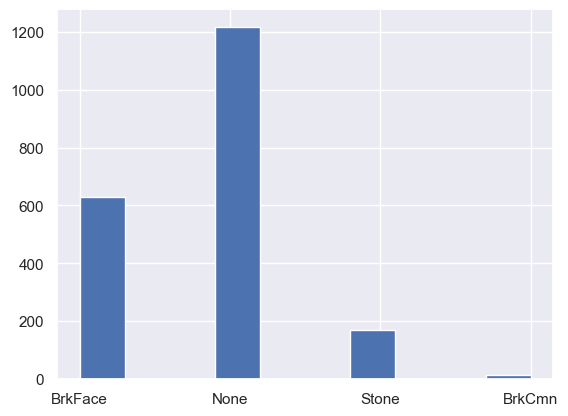

In [26]:
hse['Mas Vnr Type'].hist()

<AxesSubplot: >

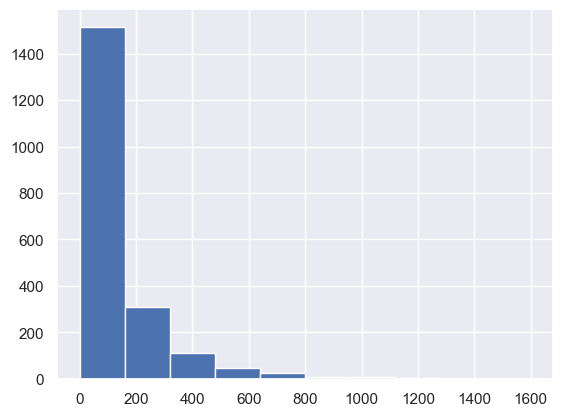

In [27]:
# Distribution for 'Mas Vnr Area' is not normally distributed
hse['Mas Vnr Area'].hist()

In [28]:
hse['Mas Vnr Area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [29]:
hse['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
118.0      1
137.0      1
195.0      1
115.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

<AxesSubplot: >

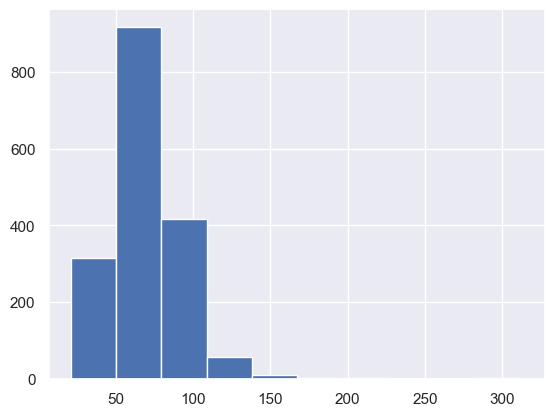

In [30]:
# Distribution for 'Lot Frontage' is not normally distributed
hse['Lot Frontage'].hist()

In [31]:
hse.iloc[1456]

Id                   1797
PID             528458090
MS SubClass            60
MS Zoning              FV
Lot Frontage         81.0
                  ...    
Misc Val                0
Mo Sold                 7
Yr Sold              2007
Sale Type             New
SalePrice          212109
Name: 1456, Length: 81, dtype: object

In [32]:
# Dropping the rows as mentioned earlier
hse_r = hse.drop(hse.index[[1456,1547,1997,1327,616,1712,1699]])
hse_r.shape

(2044, 81)

In [33]:
# Filling in all the NaN for the following columns
hse_rc = hse_r.fillna({'Alley':'None', 
                       'Bsmt Qual':'None',
                       'Bsmt Cond':'None',
                       'Bsmt Exposure':'None', 
                       'BsmtFin Type 1':'None',
                       'BsmtFin Type 2':'None',
                       'Fireplace Qu':'None', 
                       'Garage Type':'None',
                       'Garage Yr Blt':0,
                       'Garage Finish':'None', 
                       'Garage Qual':'None',
                       'Garage Cond':'None',
                       'Pool QC':'None', 
                       'Fence':'None',
                       'Misc Feature':'None',
                      })

In [34]:
hse_rc['Exter Qual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [35]:
hse_rc.isna().sum().sort_values(ascending=False)

Lot Frontage     330
Mas Vnr Type      21
Mas Vnr Area      21
Id                 0
Bedroom AbvGr      0
                ... 
Exter Qual         0
Exterior 2nd       0
Exterior 1st       0
Roof Matl          0
SalePrice          0
Length: 81, dtype: int64

### Using SimpleImputing: Method 'Mode' to impute missing datas

In [36]:
imp_MasVnrType = SimpleImputer(strategy = 'most_frequent')
hse_rc['Mas Vnr Type'] = imp_MasVnrType.fit_transform(hse_rc['Mas Vnr Type'].values.reshape(-1,1))[:,0]

In [37]:
imp_MasVnrArea = SimpleImputer(strategy = 'most_frequent')
hse_rc['Mas Vnr Area'] = imp_MasVnrArea.fit_transform(hse_rc['Mas Vnr Area'].values.reshape(-1,1))[:,0]

In [38]:
imp_LotFrontage = SimpleImputer(strategy = 'most_frequent')
hse_rc['Lot Frontage'] = imp_LotFrontage.fit_transform(hse_rc['Lot Frontage'].values.reshape(-1,1))[:,0]

In [39]:
imp_Electrical = SimpleImputer(strategy = 'most_frequent')
hse_rc['Electrical'] = imp_Electrical.fit_transform(hse_rc['Electrical'].values.reshape(-1,1))[:,0]

In [40]:
hse_rc['Electrical'].value_counts()

SBrkr    1862
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [41]:
hse_rc.isna().sum().sort_values(ascending=False)

Id              0
Heating QC      0
Garage Type     0
Fireplace Qu    0
Fireplaces      0
               ..
Mas Vnr Type    0
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
SalePrice       0
Length: 81, dtype: int64

In [42]:
hse_rc.select_dtypes(include='object').columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type'],
      dtype='object')

- Summary of Data Cleaning

|No.| Columns with Missing Data |Remedy |Reason|
|---|---|---|---|
|1.|Lot Frontage| Mode Imputing|16.09% Of Missing Data
|2.|Alley| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Alley'|
|3.|Mas Vnr Type| Mode Imputing|1.07% Of Missing Data
|4.|Mas Vnr Area| Mode Imputing|1.07% Of Missing Data
|5.|Bsmt Qual| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|6.|Bsmt Cond| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|7.|Bsmt Exposure| Renaming from 'NA' to 'None', Drop Row #1456, #1547, #1997|As Per Dataset Description, NA means 'No Basement', Rows of missing data is dropped|
|8.|BsmtFin Type 1| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|9.|BsmtFin SF 1| Drop Row #1327|Missing Data in Column Resolved|
|10.|BsmtFin Type 2| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|11.|BsmtFin SF 2| Drop Row #1327|Missing Data in Column Resolved|
|12.|Bsmt Unf SF| Drop Row #1327|Missing Data in Column Resolved|
|13.|Total Bsmt SF| Drop Row #1327|Missing Data in Column Resolved|
|14.|Bsmt Full Bath| Drop Row #616, #1327|Missing Data in Column Resolved|
|15.|Bsmt Half Bath| Drop Row #616, #1327|Missing Data in Column Resolved|
|16.|Fireplace Qu| Renaming from 'NA' to 'None'| As Per Dataset Description, NA means 'No Fireplace'|
|17.|Garage Type| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Garage'|
|18.|Garage Yr Blt| Renaming from 'NA' to '0', Drop Row #1712, Drop Row #1699|As Per Dataset Description, NA means 'No Garage',Missing data in Row #1712, Wrong year in Row #1699|
|19.|Garage Finish| Renaming from 'NA' to 'None', Drop Row #1712|As Per Dataset Description, NA means 'No Garage'|
|20.|Garage Cars| Drop Row #1712|Missing Data in Column Resolved|
|21.|Garage Area| Drop Row #1712|Missing Data in Column Resolved|
|22.|Garage Qual| Renaming from 'NA' to 'None', Drop Row #1712|As Per Dataset Description, NA means 'No Garage'|
|23.|Garage Cond| Renaming from 'NA' to 'None', Drop Row #1712|As Per Dataset Description, NA means 'No Garage'|
|24.|Pool QC| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Pool'|
|25.|Fence| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Fence'|
|26.|Misc Feature|Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Misc Feature'|

- Identifier Columns cannot be used in computation, thus they will be removed
| Columns (Identifier) | Remedy |Reason|
|---|---|---|
|Id| Drop Column|Identifier|
|PID| Drop Column|Identifier|

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\2130674360.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(hse_rc.corr(),annot=True, linewidth=.3)


<AxesSubplot: >

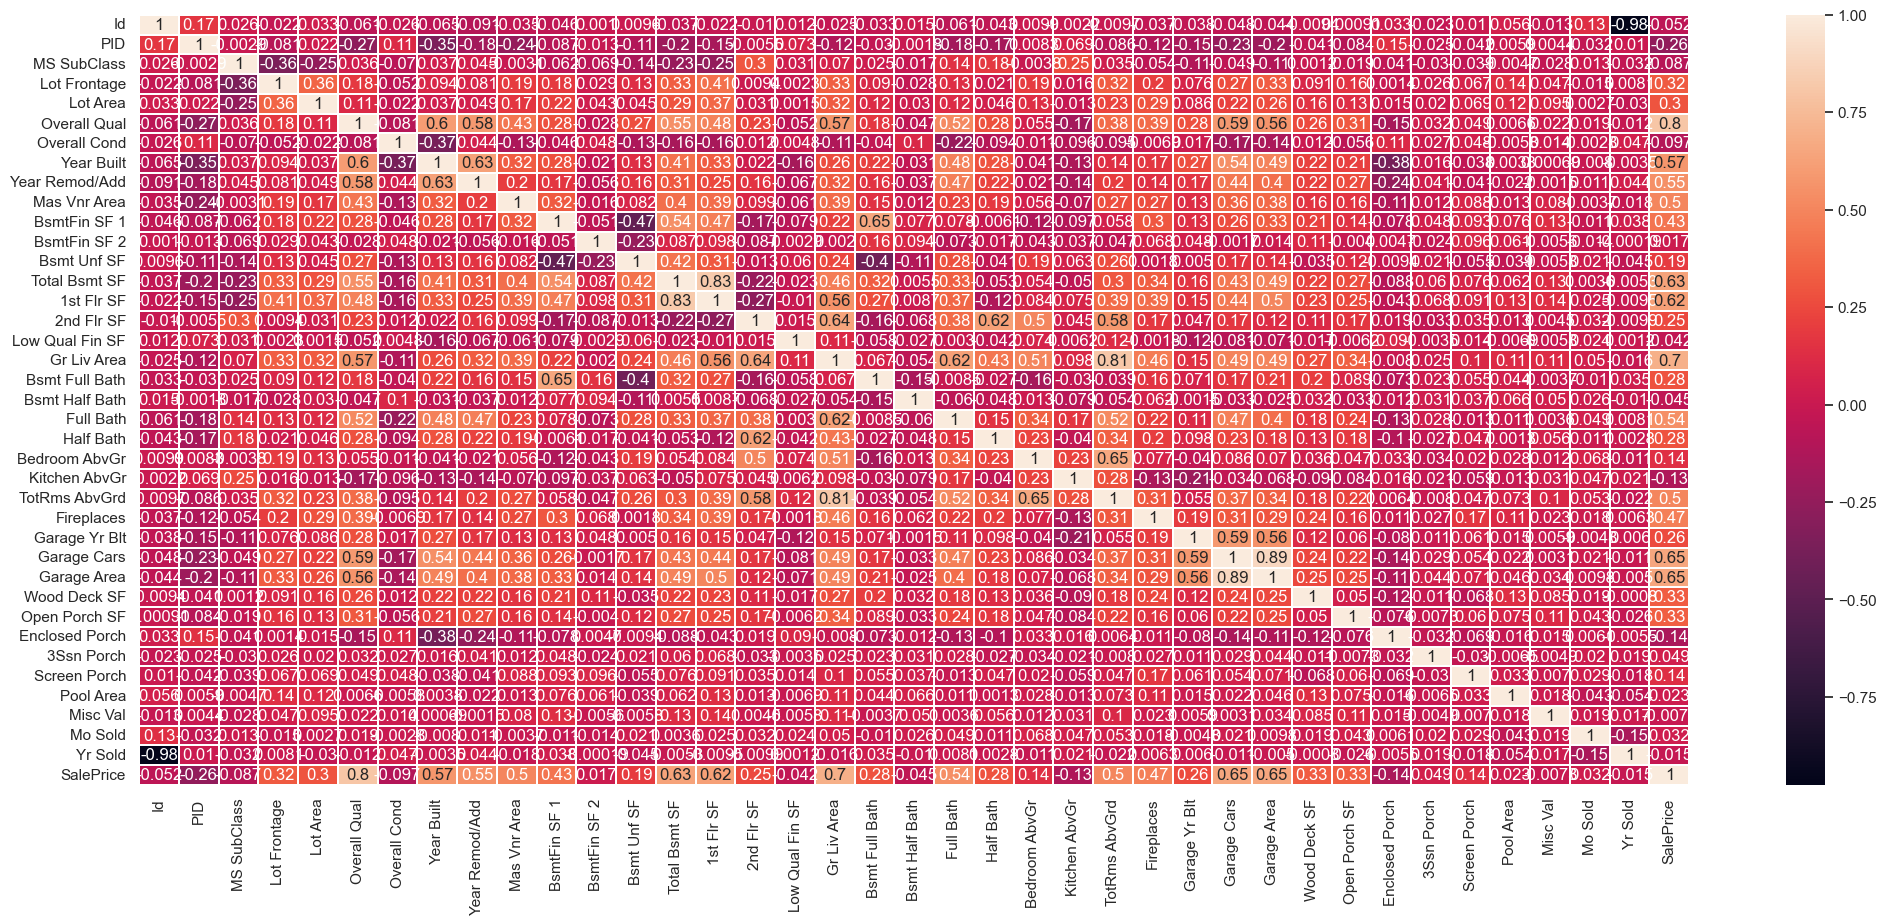

In [43]:
# Preminary look into variable's correlation
plt.figure(figsize = (25,10))
sns.heatmap(hse_rc.corr(),annot=True, linewidth=.3)

In [44]:
hse_rc.corr()

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\265910333.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hse_rc.corr()


Id       PID  MS SubClass  Lot Frontage  Lot Area  \
Id               1.000000  0.174125     0.026046     -0.021965  0.032654   
PID              0.174125  1.000000    -0.002895     -0.080984  0.021746   
MS SubClass      0.026046 -0.002895     1.000000     -0.355540 -0.245646   
Lot Frontage    -0.021965 -0.080984    -0.355540      1.000000  0.358806   
Lot Area         0.032654  0.021746    -0.245646      0.358806  1.000000   
Overall Qual    -0.061314 -0.266080     0.036144      0.182308  0.108553   
Overall Cond    -0.025966  0.105707    -0.069626     -0.051661 -0.022389   
Year Built      -0.064631 -0.346928     0.036659      0.094462  0.037025   
Year Remod/Add  -0.091301 -0.177133     0.045232      0.080988  0.049247   
Mas Vnr Area    -0.034911 -0.241946    -0.003082      0.192455  0.170125   
BsmtFin SF 1    -0.046101 -0.086966    -0.061598      0.184176  0.220124   
BsmtFin SF 2     0.001028 -0.012850    -0.068619      0.028861  0.042830   
Bsmt Unf SF      0.009646 -0.110362    -0.139436      0.133070  0.045032   
Total Bsmt SF   -0.037442 -0.203358    -0.226596      0.331618  0.286529   
1st Flr SF      -0.021784 -0.150965    -0.245811      0.412982  0.371117   
2nd Flr SF      -0.010466 -0.005479     0.304949      0.009394  0.031085   
Low Qual Fin SF  0.011844  0.072569     0.030956      0.002286  0.001545   
Gr Liv Area     -0.024870 -0.116064     0.070134      0.333341  0.318836   
Bsmt Full Bath  -0.032628 -0.030142     0.024568      0.089908  0.116267   
Bsmt Half Bath   0.014666 -0.001802    -0.017417     -0.028151  0.029995   
Full Bath       -0.060688 -0.180803     0.143865      0.128083  0.119682   
Half Bath       -0.043011 -0.165347     0.179481      0.020703  0.046290   
Bedroom AbvGr    0.009905  0.008292    -0.003760      0.190400  0.132855   
Kitchen AbvGr   -0.002206  0.068865     0.252018      0.016111 -0.013090   
TotRms AbvGrd   -0.009736 -0.085664     0.034958      0.321648  0.232688   
Fireplaces      -0.037478 -0.122166    -0.054045      0.200308  0.285958   
Garage Yr Blt   -0.037590 -0.152504    -0.110238      0.076335  0.086356   
Garage Cars     -0.047973 -0.227976    -0.048757      0.265490  0.215774   
Garage Area     -0.044006 -0.200327    -0.107687      0.326502  0.263628   
Wood Deck SF    -0.009363 -0.041424     0.001216      0.091462  0.158668   
Open Porch SF    0.000911 -0.084235    -0.019174      0.161332  0.129082   
Enclosed Porch   0.032690  0.149633    -0.041060      0.001403  0.015460   
3Ssn Porch      -0.022731 -0.024561    -0.030263      0.026437  0.019952   
Screen Porch     0.010054 -0.041657    -0.039279      0.066506  0.068939   
Pool Area        0.055853  0.005935    -0.004683      0.140362  0.116134   
Misc Val        -0.012618  0.004372    -0.027639      0.047042  0.094857   
Mo Sold          0.128864 -0.031824     0.013289     -0.015468  0.002664   
Yr Sold         -0.975753  0.010156    -0.032177      0.008121 -0.029711   
SalePrice       -0.051758 -0.255864    -0.086795      0.316399  0.295396   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Id                  -0.061314     -0.025966   -0.064631       -0.091301   
PID                 -0.266080      0.105707   -0.346928       -0.177133   
MS SubClass          0.036144     -0.069626    0.036659        0.045232   
Lot Frontage         0.182308     -0.051661    0.094462        0.080988   
Lot Area             0.108553     -0.022389    0.037025        0.049247   
Overall Qual         1.000000     -0.080812    0.602664        0.584960   
Overall Cond        -0.080812      1.000000   -0.369943        0.044291   
Year Built           0.602664     -0.369943    1.000000        0.629373   
Year Remod/Add       0.584960      0.044291    0.629373        1.000000   
Mas Vnr Area         0.429862     -0.131332    0.320930        0.204748   
BsmtFin SF 1         0.279464     -0.045917    0.277568        0.168457   
BsmtFin SF 2        -0.028110      0.047803   -0.020735       -0.056482   
Bsmt Un

With most of the variables having low correlation with the SalePrice, we might observe that the Linear Regression model might not be a good model for the baseline. However, this will still be incorporated in the study as a measurement of baseline.

In [45]:
# Categorical variables to do via get dummies
hse_rc_dumb = pd.get_dummies(hse_rc, columns=['MS SubClass','MS Zoning', 'Street', 'Alley', 'Lot Shape', 
                                         'Land Contour','Utilities', 'Lot Config', 'Land Slope', 
                                         'Neighborhood', 'Condition 1','Condition 2', 'Bldg Type', 
                                         'House Style', 'Roof Style', 'Roof Matl','Exterior 1st', 
                                         'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual','Exter Cond', 
                                         'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                                         'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
                                         'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
                                         'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
                                         'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
                                         'Sale Type'], drop_first= True)

In [46]:
X = hse_rc_dumb.drop(['Id','PID','SalePrice'], axis =1)
y = hse_rc_dumb['SalePrice']

print('X:', X.shape)
print('y:', y.shape)

X: (2044, 275)
y: (2044,)


In [47]:
hse_rc_dumb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 2050
Columns: 278 entries, Id to Sale Type_WD 
dtypes: float64(11), int64(27), uint8(240)
memory usage: 1.1 MB


## Train Test Split the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

## Scaling & Modeling the data

In [49]:
ss = StandardScaler()
X_ss_train = ss.fit_transform(X_train)
X_ss_test = ss.transform(X_test)
ss_X_train_df = pd.DataFrame(X_ss_train, columns = X_train.columns)
ss_X_test_df = pd.DataFrame(X_ss_test, columns = X_test.columns)

In [50]:
ss_X_test_df

Lot Frontage  Lot Area  Overall Qual  Overall Cond  Year Built  \
0       -0.225542 -0.118751     -0.806554     -0.515908    0.139466   
1       -0.831314 -0.720864     -3.599209     -2.327790   -0.852041   
2       -0.132346 -0.324032     -0.806554     -0.515908   -0.124936   
3        1.964556  0.579067      1.287937     -0.515908    1.031823   
4       -0.924509 -0.547110      1.287937     -0.515908    1.130974   
..            ...       ...           ...           ...         ...   
506     -0.365336 -0.045606     -0.806554     -0.515908   -0.157986   
507      1.498578  0.449172     -0.806554     -0.515908    0.073366   
508     -0.365336 -0.412591     -0.806554      2.201915   -1.050342   
509     -0.178944  0.129269     -2.901046     -1.421849   -1.083393   
510     -0.365336 -0.917038     -0.108391      1.295974   -1.810498   

     Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0         -0.395307     -0.569750      2.491532     -0.291092    -1.009849   
1         -1.631860     -0.569750     -0.934141     -0.291092    -1.281250   
2         -0.775785     -0.569750      0.718970     -0.291092    -1.083261   
3          0.888805      0.971890      1.066657     -0.291092    -0.438126   
4          1.079044      0.399281      0.870416     -0.291092    -0.177848   
..              ...           ...           ...           ...          ...   
506       -0.823345     -0.399069      0.025730     -0.291092    -0.320222   
507       -0.490427     -0.569750      0.691241     -0.291092    -1.054341   
508       -1.631860      0.966384     -0.934141     -0.291092     0.516228   
509       -1.631860     -0.569750     -0.934141     -0.291092    -1.281250   
510        1.079044     -0.569750     -0.934141     -0.291092     0.106901   

     ...  Misc Feature_Shed  Misc Feature_TenC  Sale Type_CWD  Sale Type_Con  \
0    ...          -0.165771          -0.025549      -0.072429      -0.051148   
1    ...          -0.165771          -0.025549      -0.072429      -0.051148   
2    ...          -0.165771          -0.025549      -0.072429      -0.051148   
3    ...          -0.165771          -0.025549      -0.072429      -0.051148   
4    ...          -0.165771          -0.025549      -0.072429      -0.051148   
..   ...                ...                ...            ...            ...   
506  ...          -0.165771          -0.025549      -0.072429      -0.051148   
507  ...          -0.165771          -0.025549      -0.072429      -0.051148   
508  ...          -0.165771          -0.025549      -0.072429      -0.051148   
509  ...          -0.165771          -0.025549      -0.072429      -0.051148   
510  ...          -0.165771          -0.025549      -0.072429      -0.051148   

     Sale Type_ConLD  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
0          -0.088823        -0.067729        -0.044281      -0.292735   
1          -0.088823        -0.067729        -0.044281      -0.292735   
2          -0.088823        -0.067729        -0.044281      -0.292735   
3          -0.088823        -0.067729        -0.044281      -0.292735   
4          -0.088823        -0.067729        -0.044281      -0.292735   
..               ...              ...              ...            ...   
506        -0.088823        -0.067729        -0.044281      -0.292735   
507        -0.088823        -0.067729        -0.044281      -0.292735   
508        -0.088823        -0.067729        -0.044281      -0.292735   
509        -0.088823        -0.067729        -0.044281      -0.292735   
510        -0.088823        -0.067729        -0.044281      -0.292735   

     Sale Type_Oth  Sale Type_WD   
0        -0.044281       0.394002  
1        -0.044281       0.394002  
2        -0.044281       0.394002  
3        -0.044281       0.394002  
4        -0.044281       0.394002  
..             ...            ...  
506      -0.044281       0.394002  
507      -0.044281       0.394002  
508      -0.044281       0.394002  
509      -0.04428

### Linear Regression Model

In [51]:
lr = LinearRegression()
lr.fit(X_ss_train,y_train)
cross_val_score(lr, X_ss_train,y_train, cv=5).mean()

-7.244346905924349e+24

In [52]:
# Predict using test data
y_pred_train_lr = lr.predict(X_ss_test)

In [53]:
# Checking the R^2 score of LR
metrics.r2_score(y_test, y_pred_train_lr)

-6.742245148442978e+21

In [54]:
#Check RMSE of Linear Model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_train_lr))

6180378761706928.0

### RidgeCV Model

In [55]:
ridge_model = Ridge()
ridge_model.fit(X_ss_train,y_train)
r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(X_ss_train,y_train)
print(ridge_cv.score(X_ss_train, y_train))
print(ridge_cv.score(X_ss_test, y_test))

0.9065645344596377
0.8934036926777438


In [56]:
ridge_cv.alpha_

533.6699231206308

In [57]:
y_pred_train_ridge = ridge_cv.predict(X_ss_test)

In [58]:
#Check RMSE of RidgeCV Model
np.sqrt(metrics.mean_squared_error(y_test, y_pred_train_ridge))

24574.45538489632

### LassoCV Model

In [59]:
lasso_model = Lasso()
lasso_model.fit(X_ss_train,y_train)
l_alphas = np.logspace(-3, 0, 100)
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000).fit(X_ss_train, y_train)
print(lasso_cv.alpha_)
print(lasso_cv.score(X_ss_train, y_train))
print(lasso_cv.score(X_ss_test, y_test))

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+11, tolerance: 9.942e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11317614956.800903, tolerance: 786622322.9914777
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11283504015.580505, tolerance: 786622322.9914777
  model = cd_fast.enet_coordinate_descent_gram(


1.0
0.9474236775511364
0.8490788188268953


In [60]:
y_pred_train_lasso = lasso_cv.predict(X_ss_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_train_lasso))

29240.71039502746

In [61]:
pd.Series(lasso_cv.coef_,X_train.columns).sort_values(ascending=False)

Roof Matl_CompShg    134780.516374
Misc Feature_None    102414.687394
Roof Matl_Tar&Grv     96068.023642
Misc Feature_Shed     94993.960207
Roof Matl_WdShngl     67523.007549
                         ...      
Exter Qual_TA        -12922.947036
Pool QC_None         -23749.908429
Garage Qual_Fa       -28088.700345
Garage Qual_TA       -41999.391894
Pool Area            -52781.893560
Length: 275, dtype: float64

In [62]:
LassoSeries = pd.Series(lasso_cv.coef_,X_train.columns).sort_values(ascending=False)

In [63]:
LassoSeries[LassoSeries == 0]

Exterior 2nd_CBlock    0.0
Bsmt Unf SF           -0.0
Condition 2_RRAn       0.0
MS Zoning_RL           0.0
Utilities_NoSeWa       0.0
Condition 2_RRAe       0.0
Garage Finish_None    -0.0
dtype: float64

In [64]:
LassoSeries.value_counts()

 0.000000         7
 134780.516374    1
-592.773303       1
-961.328743       1
-951.164291       1
                 ..
 950.625659       1
 923.150981       1
 901.242131       1
 868.592665       1
-52781.893560     1
Length: 269, dtype: int64

### ElasticNetCV Model

In [65]:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_l1_ratio = np.linspace(0.1, 1.0, 100)
enet_model = ElasticNetCV(alphas=enet_alphas, cv=5, l1_ratio = enet_l1_ratio)
enet_model = enet_model.fit(X_ss_train, y_train)
print(enet_model.score(X_ss_train, y_train))
print(enet_model.score(X_ss_test, y_test))
print(enet_model.alpha_)
enet_model.l1_ratio_

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1681777717.303833, tolerance: 788513515.2708979
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1439196896.6270752, tolerance: 803167781.3313814
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179826361575.0422, tolerance: 790834242.54444
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\

0.9029765119023386
0.893306297558153
0.98989898989899


0.5818181818181818

In [66]:
y_pred_train_enet = enet_model.predict(X_ss_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred_train_enet))

24585.679439565385

**Summary of Scores of Base Model**

|Base Model | R^2 - Train| R^2 - Test |RMSE|
|---|---|---|---|
|Linear Regression|-7.24e+24 |-6.74e+21|6.18e+15|
|RidgeCV|0.907|0.893|28691.27|
|LassoCV|0.947|0.849|29240.71|
|ElasticCV|0.903|0.893|24585.68|



The base model score for Linear Regression is very bad as it looks into linear relationship with the variables which most of the variables does not have good relation as seen from the heatmap earlier. The other 3 models having regularisation inbuilt in the model seems to have improved the R^2 and RMSE values.

# Modifying the Base Model

## EDA

### Continuous Variables 

- Looking into SalePrice

Text(0.5, 1.0, 'Distribution of Sale Price')

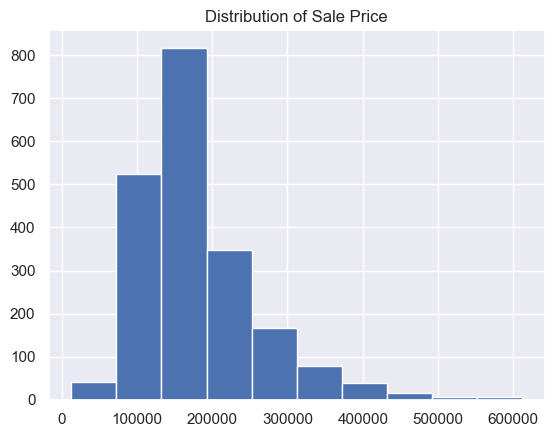

In [67]:
plt.hist(x=hse_rc['SalePrice'])
plt.title("Distribution of Sale Price")

In [68]:
hse_rc['SalePrice'].describe()

count      2044.000000
mean     181402.318982
std       79295.223538
min       12789.000000
25%      129725.000000
50%      162250.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

From the histogram, we can observe that the distribution of house prices is right-skewed with the average price of houses being \\$181,402. 50\% of the houses are priced between \\$129,725 and $214,000.

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\2069964406.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hse_rc.corr()['SalePrice'].abs().sort_values().plot(kind='bar')


Text(0.5, 1.0, 'Correlation of Numeric Variables with Sale Price')

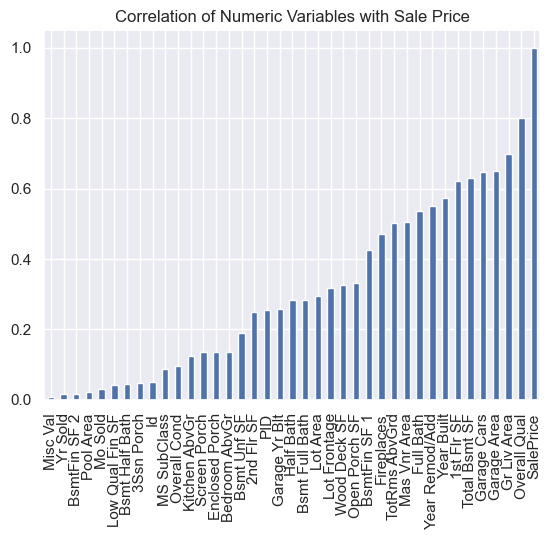

In [69]:
# Exploring the correlation of numberic variables with the sale price
hse_rc.corr()['SalePrice'].abs().sort_values().plot(kind='bar')
plt.title("Correlation of Numeric Variables with Sale Price")

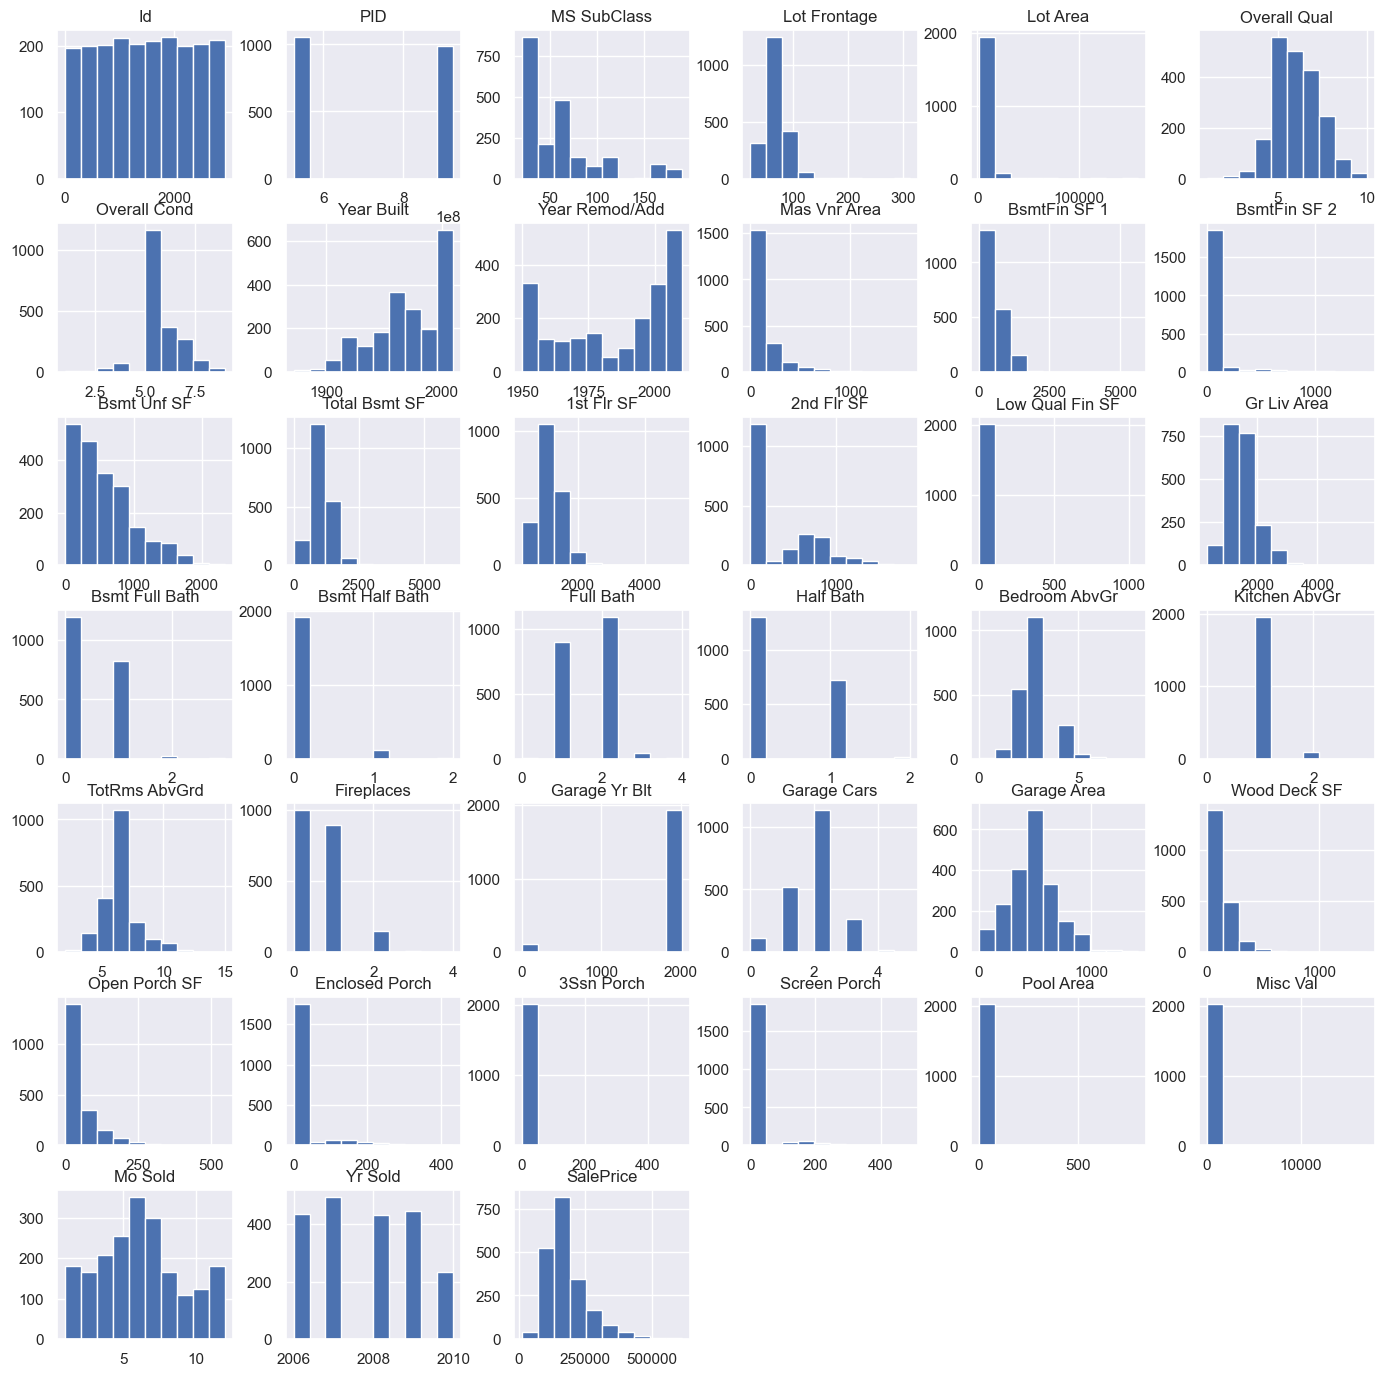

In [314]:
# Plot histogram for all numerical columns
hse_rc.hist(figsize=(17, 17));

- Most of the histograms are skewed

#### House Floor Square Foot - 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area

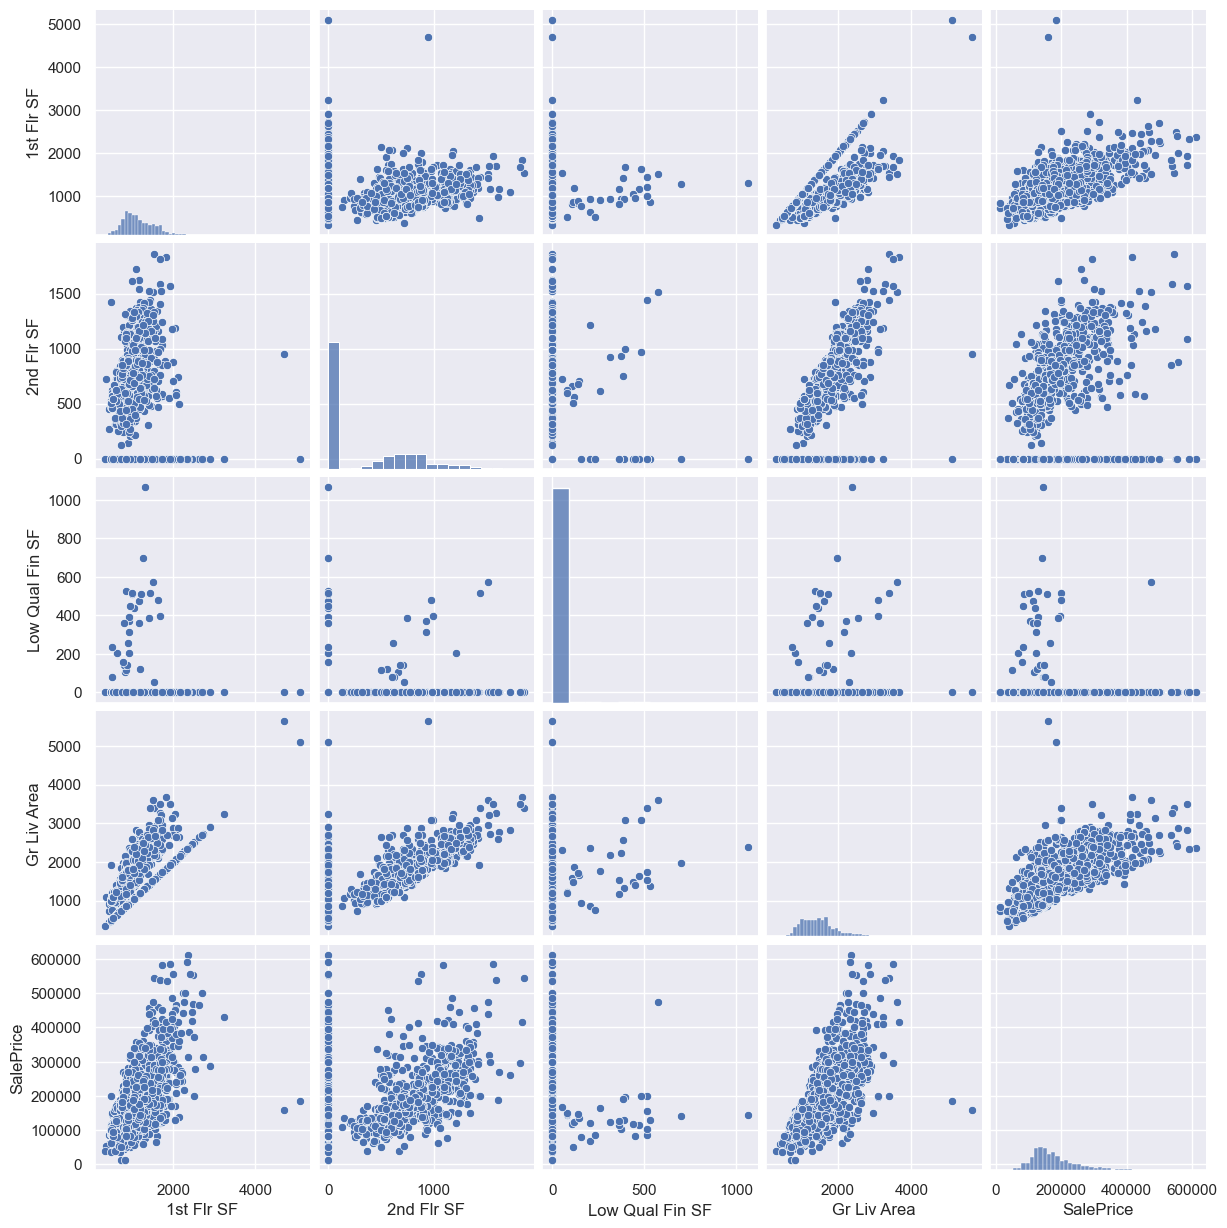

In [70]:
sns.pairplot(hse_rc[['1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'SalePrice']])

In [71]:
hse_rc[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']].tail(10)

1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area
2041        1572        1096                0         2668
2042         964           0              450         1414
2043         608         624                0         1232
2044         754         855                0         1609
2045        1932           0                0         1932
2046        1728           0                0         1728
2047         861           0                0          861
2048        1172         741                0         1913
2049        1200           0                0         1200
2050        1028         776                0         1804

In [72]:
(hse_rc['Gr Liv Area']).corr(hse_rc['SalePrice'])

0.6981967908003395

In [73]:
(hse_rc['1st Flr SF']).corr(hse_rc['SalePrice'])

0.6214453085465466

In [74]:
(hse_rc['2nd Flr SF']).corr(hse_rc['SalePrice'])

0.24972725749737817

In [75]:
(hse_rc['Low Qual Fin SF']).corr(hse_rc['SalePrice'])

-0.04155518238581238

In [76]:
(hse_rc['1st Flr SF']+ hse_rc['2nd Flr SF']).corr(hse_rc['SalePrice'])

0.7065233499452327

In [77]:
(hse_rc['1st Flr SF']+ hse_rc['2nd Flr SF'] + 0.5*hse_rc['Low Qual Fin SF']).corr(hse_rc['SalePrice'])

0.7032772646052554

In [78]:
(hse_rc['1st Flr SF']+ hse_rc['2nd Flr SF'] + hse_rc['Low Qual Fin SF']).corr(hse_rc['SalePrice'])

0.6981967908003395

From the table, we can see that the 'Gr Liv Area' is the summation of '1st Flr SF', '2nd Flr SF' and 'Low Qual Fin SF'.
From the pairplot, the 1st Floor SF(0.621) has good correlation with Sale price and 2nd Floor SF(0.250) and Low Qual Fin SF(-0.04) has some correlation with the the Sale price.

#### Bathroom - Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath

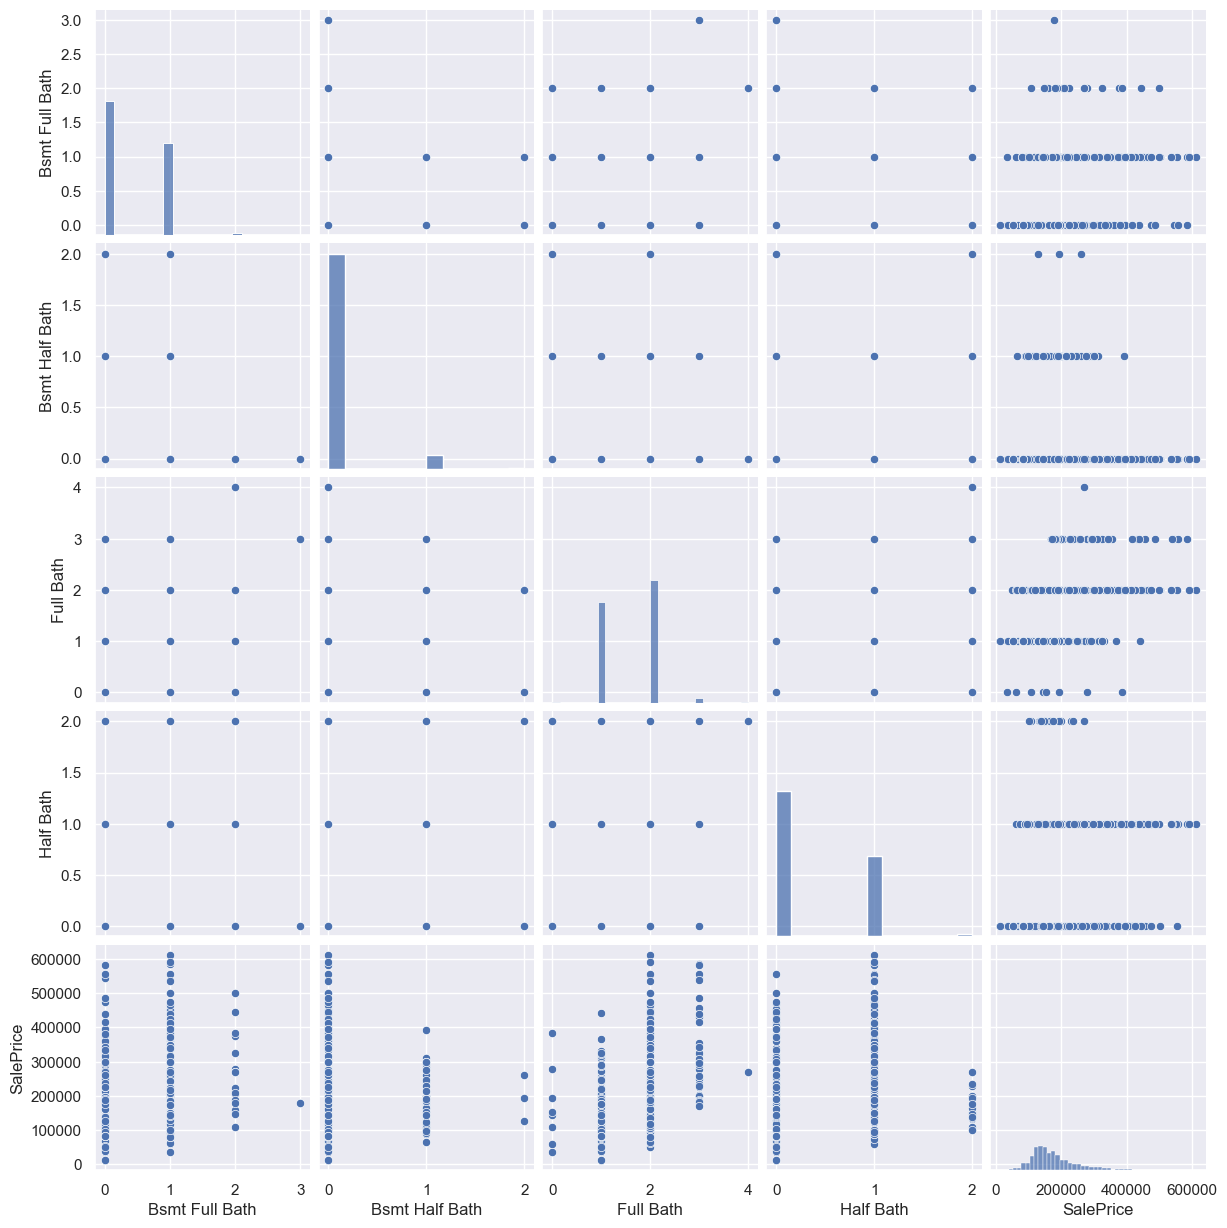

In [79]:
sns.pairplot(hse_rc[['Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'SalePrice']])

In [80]:
(hse_rc['Bsmt Full Bath']).corr(hse_rc['SalePrice'])

0.2847084669890203

In [81]:
(hse_rc['Bsmt Half Bath']).corr(hse_rc['SalePrice'])

-0.04513722223914258

In [82]:
(hse_rc['Half Bath']).corr(hse_rc['SalePrice'])

0.2829852348930173

In [83]:
(hse_rc['Full Bath']).corr(hse_rc['SalePrice'])

0.5375564191820114

In [84]:
(hse_rc['Bsmt Full Bath']+ 0.5*hse_rc['Bsmt Half Bath'] + hse_rc['Full Bath'] 
 + 0.5*hse_rc['Half Bath']).corr(hse_rc['SalePrice'])

0.6299205843529961

Looking into the individual correlation values, 'Full Bath' has the highest correlation(0.538) with the sales price, however the other variables such as 'Bsmt Full Bath'(0.285), Bsmt Half Bath'(-0.045), 'Half Bath'(0.283) has poor or no correlation.

#### Basement - BsmtFin SF 1, BsmtFin SF 2 , Bsmt Unf SF , Total Bsmt SF

In [85]:
hse_rc[['BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']]

BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0               GLQ         533.0            Unf           0.0        192.0   
1               GLQ         637.0            Unf           0.0        276.0   
2               GLQ         731.0            Unf           0.0        326.0   
3               Unf           0.0            Unf           0.0        384.0   
4               Unf           0.0            Unf           0.0        676.0   
...             ...           ...            ...           ...          ...   
2046            GLQ        1011.0            Unf           0.0        873.0   
2047            BLQ         262.0            Unf           0.0        599.0   
2048            Unf           0.0            Unf           0.0        896.0   
2049            Rec         155.0            LwQ         750.0        295.0   
2050            Unf           0.0            Unf           0.0        994.0   

      Total Bsmt SF  
0             725.0  
1             913.0  
2            1057.0  
3             384.0  
4             676.0  
...             ...  
2046         1884.0  
2047          861.0  
2048          896.0  
2049         1200.0  
2050          994.0  

[2044 rows x 6 columns]

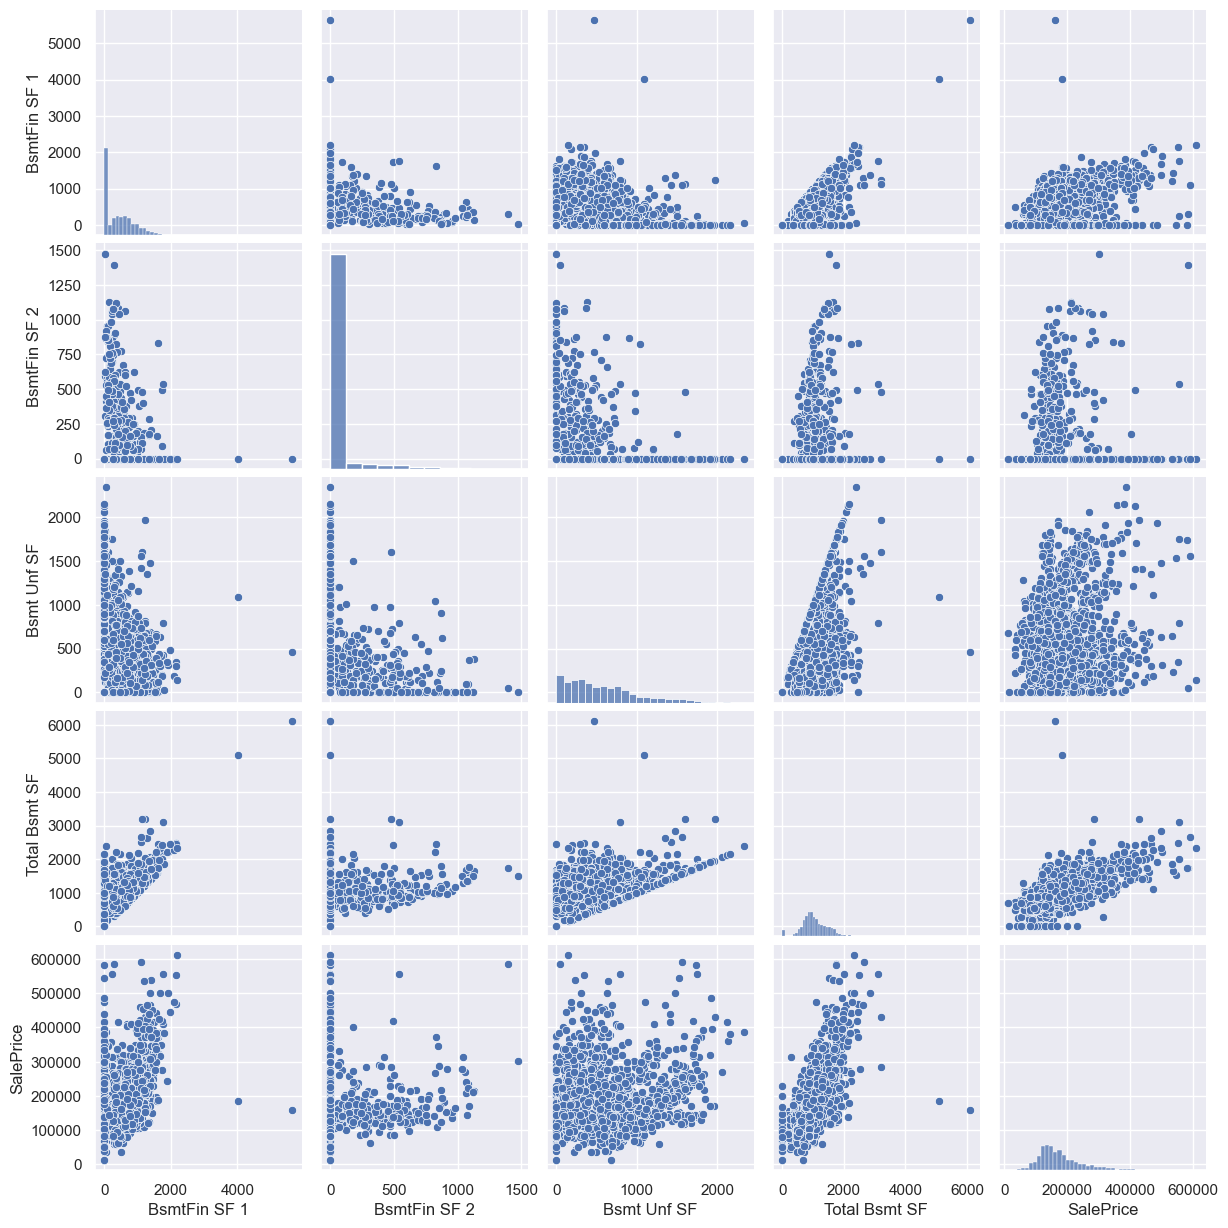

In [86]:
sns.pairplot(hse_rc[['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'SalePrice']])

In [87]:
hse_rc['BsmtFin SF 1'].corr(hse_rc['SalePrice'])

0.4252490170337734

In [88]:
hse_rc['BsmtFin SF 2'].corr(hse_rc['SalePrice'])

0.016702116915397858

In [89]:
hse_rc['Bsmt Unf SF'].corr(hse_rc['SalePrice'])

0.19032273616238288

In [90]:
hse_rc['Total Bsmt SF'].corr(hse_rc['SalePrice'])

0.6315417954438489

In [91]:
print(hse_rc['BsmtFin SF 1'].corr(hse_rc['SalePrice']))
hse_rc['BsmtFin SF 2'].corr(hse_rc['SalePrice'])

0.4252490170337734


0.016702116915397858

From the table, we observed that 'Total Bsmt SF' is the summation of 'BsmtFin SF 1' and 'BsmtFin SF 2'.
Only 'Total Bsmt SF'(0.632) has good correlation with the 'SalePrice'.
There is some correlation of the 'BsmtFin SF 1'(0.425) with 'SalePrice' but almost no correlation with 'Bsmt Unf SF'(0.190) and 'BsmtFin SF 2'(0.016) the 'SalePrice'.

#### Garage - Garage Cars, Garage Area

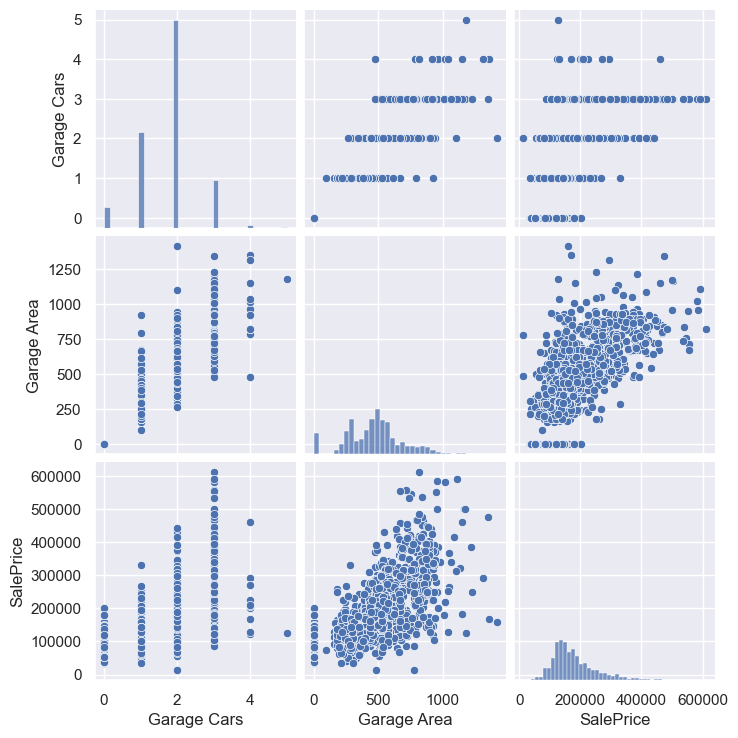

In [92]:
sns.pairplot(hse_rc[['Garage Cars','Garage Area', 'SalePrice']])

In [93]:
(hse_rc['Garage Cars']).corr(hse_rc['SalePrice'])

0.6481769304830196

In [94]:
(hse_rc['Garage Area']).corr(hse_rc['SalePrice'])

0.6502344964959684

From the above pairplot and correlation data, we can see that both the 'Garage Cars'(0.648) and 'Garage Area'(0.650) has good correlation with the SalePrice. Since, they are rather similar in measuring the size of the Garage, we can drop one variable. In this case we will drop 'Garage Cars'.

#### Outdoor Square Foot - Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch,Screen Porch

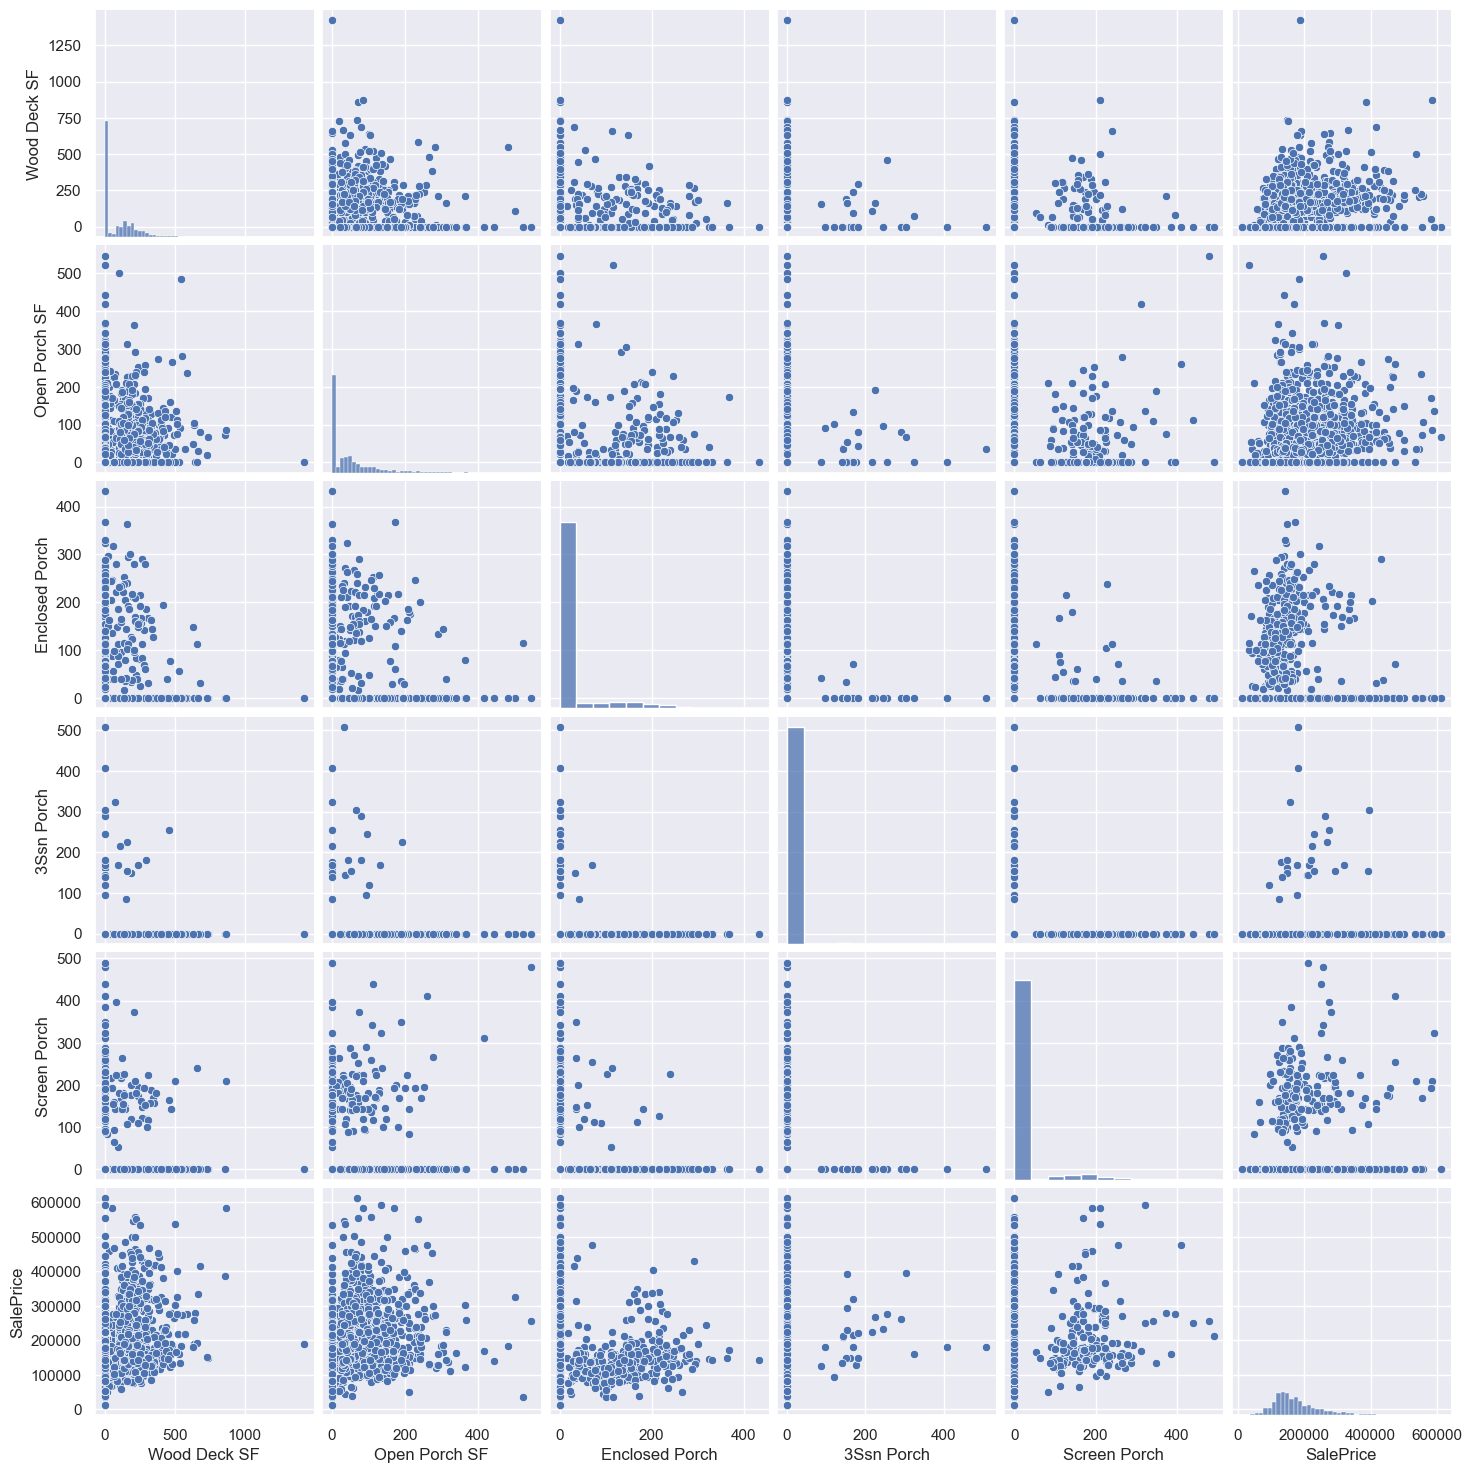

In [95]:
sns.pairplot(hse_rc[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch','SalePrice']])

In [96]:
(hse_rc['Wood Deck SF']).corr(hse_rc['SalePrice'])

0.32706673955372806

In [97]:
(hse_rc['Open Porch SF']).corr(hse_rc['SalePrice'])

0.33302894684896467

In [98]:
(hse_rc['Enclosed Porch']).corr(hse_rc['SalePrice'])

-0.13519817792910774

In [99]:
(hse_rc['3Ssn Porch']).corr(hse_rc['SalePrice'])

0.04888111713812109

In [100]:
(hse_rc['Screen Porch']).corr(hse_rc['SalePrice'])

0.13501379848006617

In [101]:
(hse_rc['Wood Deck SF'] + hse_rc['Open Porch SF'] + hse_rc['Enclosed Porch'] +
 hse_rc['3Ssn Porch'] + hse_rc['Screen Porch']).corr(hse_rc['SalePrice'])

0.4066178637941912

Text(0.5, 1.0, 'Correlation of Numeric Variables with Sale Price')

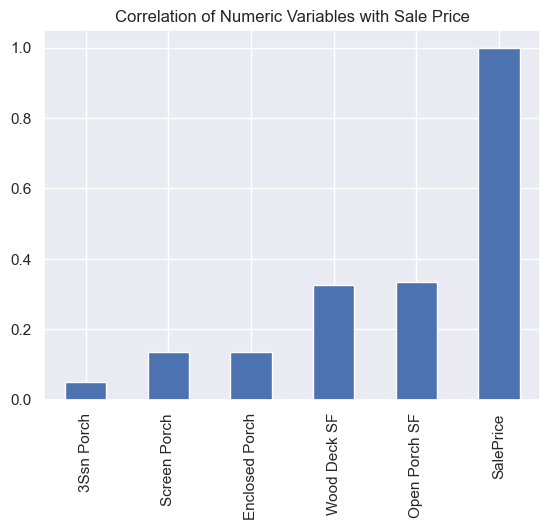

In [102]:
hse_rc[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch','SalePrice']].corr()['SalePrice'].abs().sort_values().plot(kind='bar')
plt.title("Correlation of Numeric Variables with Sale Price")

'Wood Deck SF'(0.327) and 'Open Porch SF'(0.333) have a poor correlation with the SalePrice.
'Enclosed Porch'(-0.135), '3Ssn Porch'(0.049) and 'Screen Porch'(0.135) have almost no correlation with Sale Price

#### Dates - Year Built, Year Remod/Add, Garage Yr Blt, Mo Sold, Yr Sold

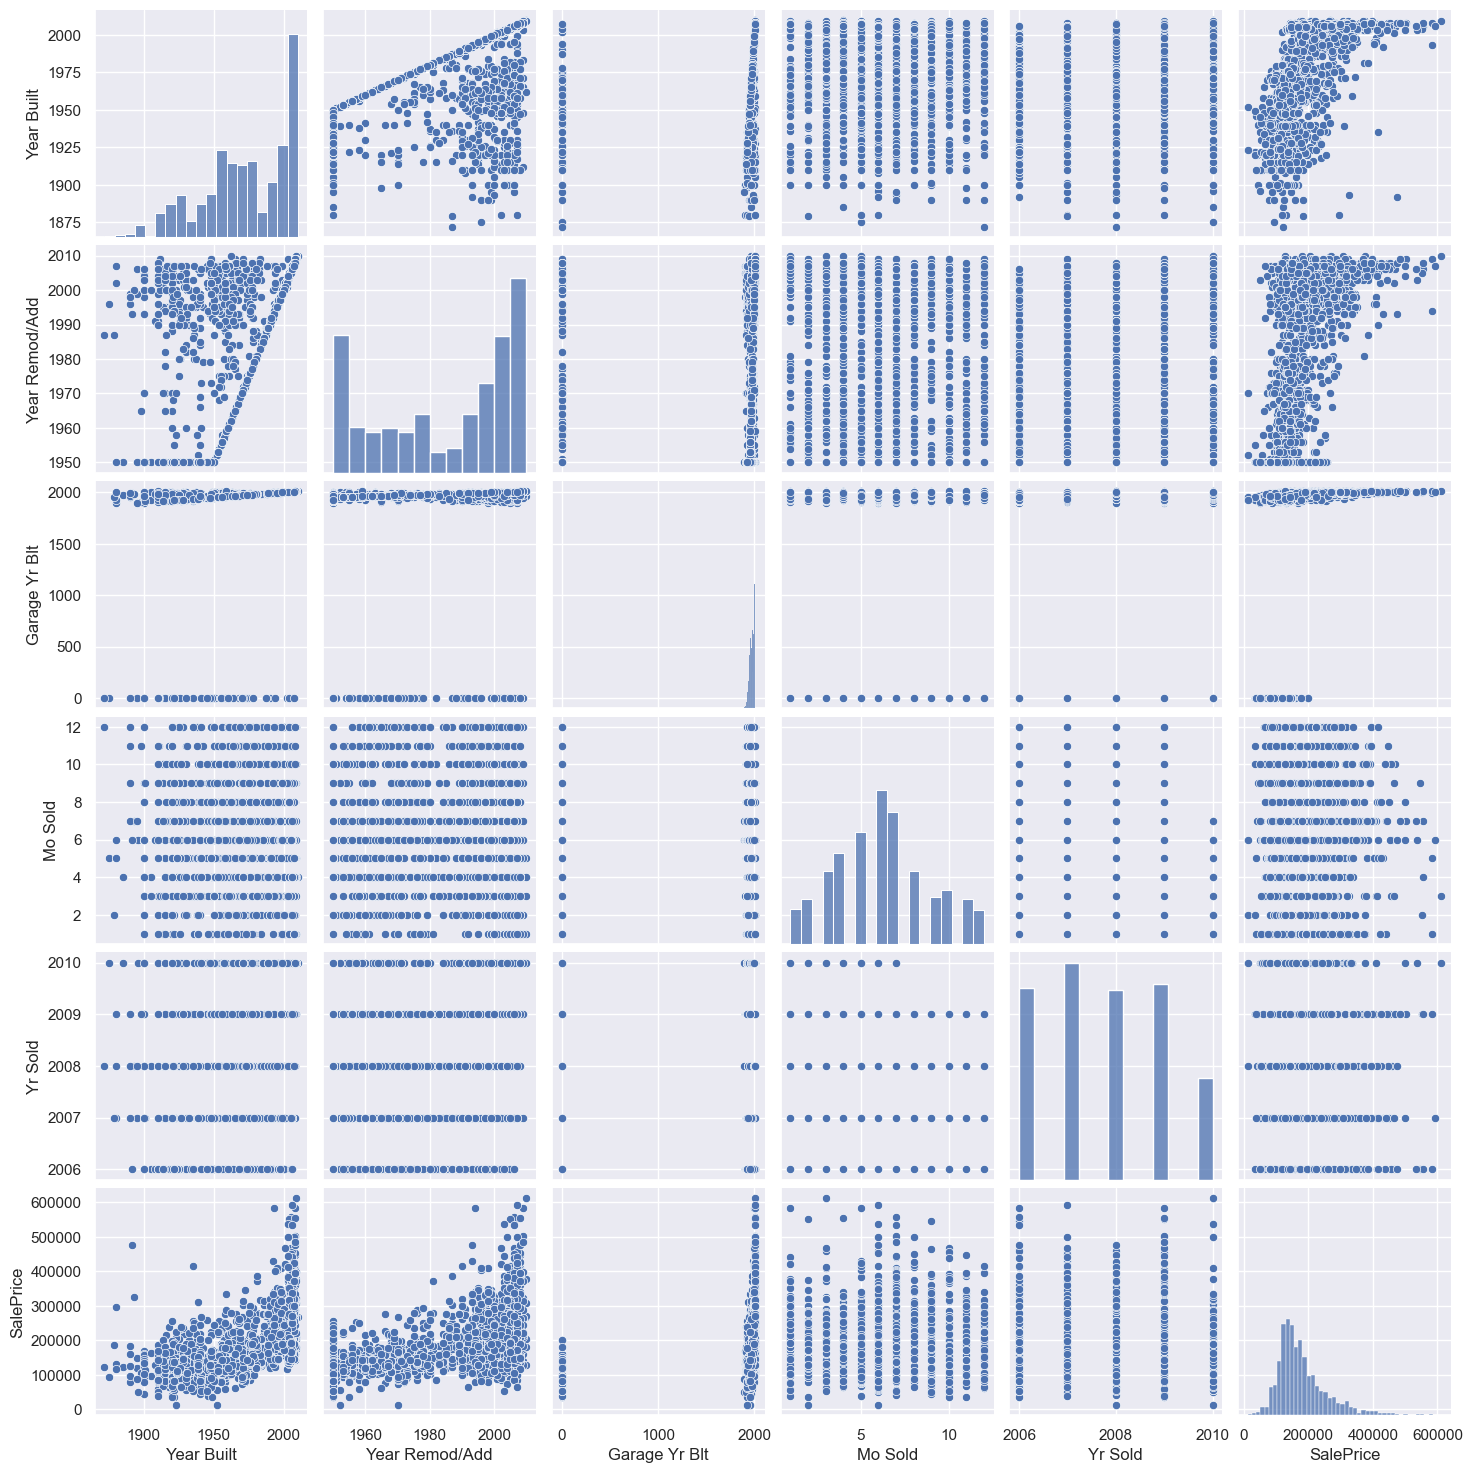

In [103]:
sns.pairplot(hse_rc[['Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold', 'SalePrice']])

In [104]:
(hse_rc['Year Built']).corr(hse_rc['SalePrice'])

0.5719988780573987

In [105]:
(hse_rc['Year Remod/Add']).corr(hse_rc['SalePrice'])

0.5497338657866773

In [106]:
(hse_rc['Mo Sold']).corr(hse_rc['SalePrice'])

0.031534130089082665

In [107]:
(hse_rc['Yr Sold']).corr(hse_rc['SalePrice'])

-0.01525742520273341

In [108]:
(hse_rc['Year Built'] * hse_rc['Year Remod/Add']).corr(hse_rc['SalePrice'])

0.6220573972250081

In [109]:
(hse_rc['Yr Sold'] - hse_rc['Year Built'] ).corr(hse_rc['SalePrice'])

-0.5720341993779994

In [110]:
(hse_rc['Year Remod/Add'] - hse_rc['Year Built']).corr(hse_rc['SalePrice'])

-0.2419291204533166

In [111]:
((hse_rc['Yr Sold'].astype(str) + hse_rc['Mo Sold'].astype(str).apply(lambda x:x.zfill(2))).astype(int)).corr(hse_rc['SalePrice'])

-0.014640059269073597

In [112]:
hse_rc['Mo Sold'].astype(str).apply(lambda x:x.zfill(2))

0       03
1       04
2       01
3       04
4       03
        ..
2046    01
2047    03
2048    03
2049    11
2050    06
Name: Mo Sold, Length: 2044, dtype: object

Looking into the dates relation with the SalePrice, 'Year Built'(0.622) and 'Year Remod/Add'(-0.242) has correlation with the SalePrice but not for 'Mo Sold'(0.032) and 'Yr Sold'(0.015). This can be observed with the pairplot as well.

### Categorical Variables

#### Categorical Variables - Nominal Variables

20     766
60     392
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
180     11
45      11
40       4
150      1
Name: MS SubClass, dtype: int64

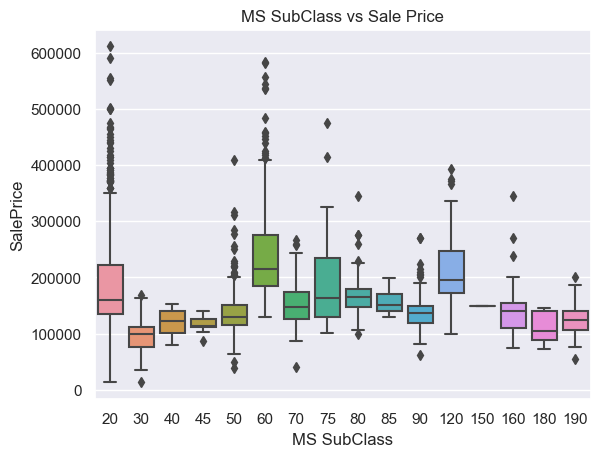

In [113]:
# MS SubClass
sns.boxplot(data=hse_rc, x='MS SubClass', y='SalePrice')
plt.title("MS SubClass vs Sale Price")
hse_rc['MS SubClass'].value_counts()

RL         1594
RM          314
FV          100
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

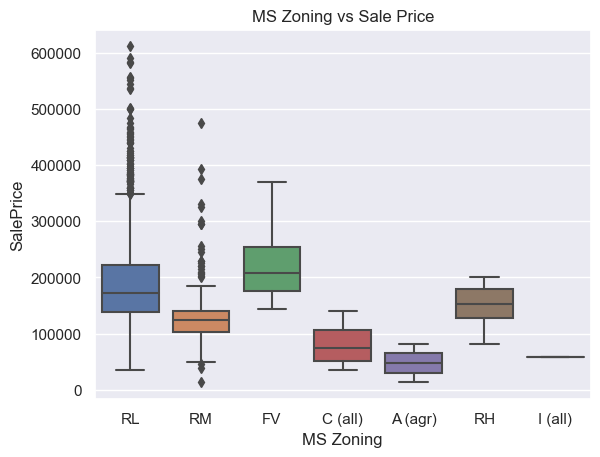

In [114]:
# MS Zoning
sns.boxplot(data=hse_rc, x='MS Zoning', y='SalePrice')
plt.title("MS Zoning vs Sale Price")
hse_rc['MS Zoning'].value_counts()

Pave    2037
Grvl       7
Name: Street, dtype: int64

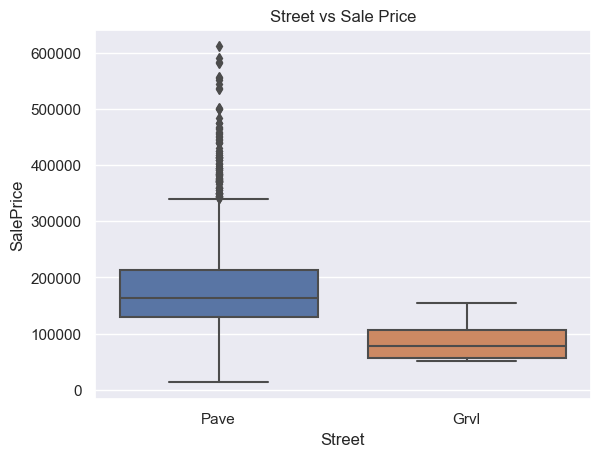

In [115]:
# Street
sns.boxplot(data=hse_rc, x='Street', y='SalePrice')
plt.title("Street vs Sale Price")
hse_rc['Street'].value_counts()

None    1904
Grvl      85
Pave      55
Name: Alley, dtype: int64

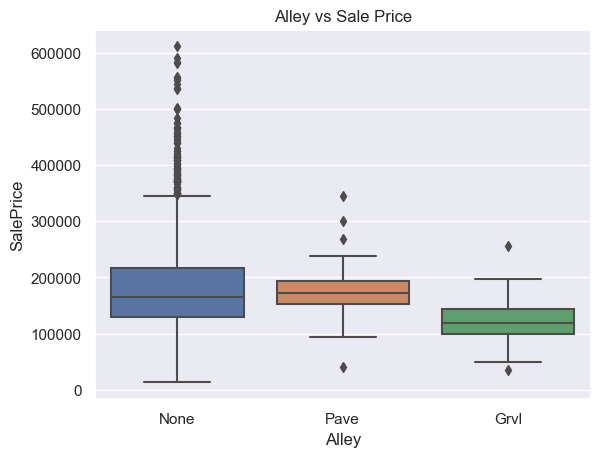

In [116]:
# Alley
sns.boxplot(data=hse_rc, x='Alley', y='SalePrice')
plt.title("Alley vs Sale Price")
hse_rc['Alley'].value_counts()

Lvl    1837
HLS      84
Bnk      80
Low      43
Name: Land Contour, dtype: int64

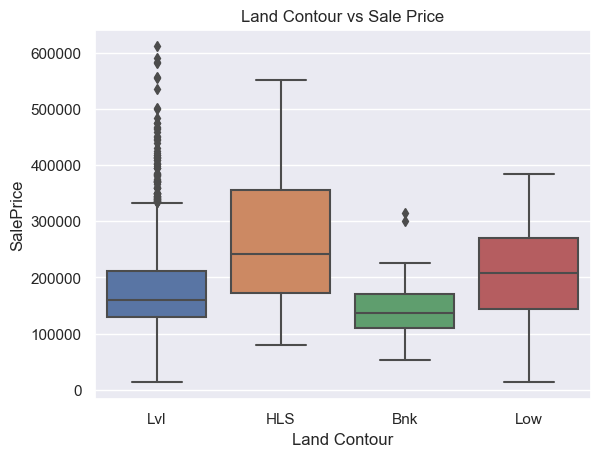

In [117]:
# Land Contour
sns.boxplot(data=hse_rc, x='Land Contour', y='SalePrice')
plt.title("Land Contour vs Sale Price")
hse_rc['Land Contour'].value_counts()

Inside     1498
Corner      347
CulDSac     131
FR2          60
FR3           8
Name: Lot Config, dtype: int64

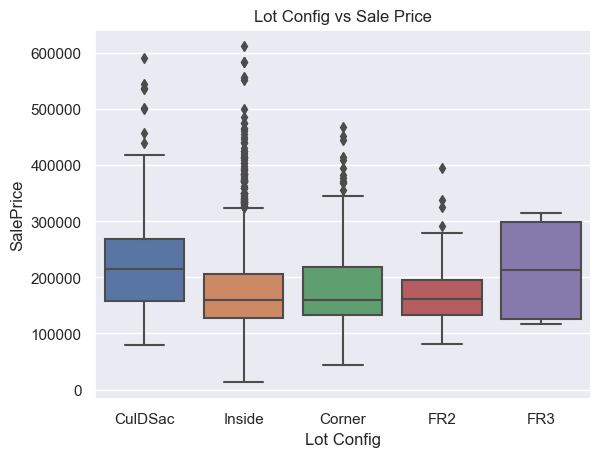

In [118]:
# Log Config
sns.boxplot(data=hse_rc, x='Lot Config', y='SalePrice')
plt.title("Lot Config vs Sale Price")
hse_rc['Lot Config'].value_counts()

NAmes      310
CollgCr    179
OldTown    163
Edwards    142
Somerst    128
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      68
NoRidge     48
Timber      47
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

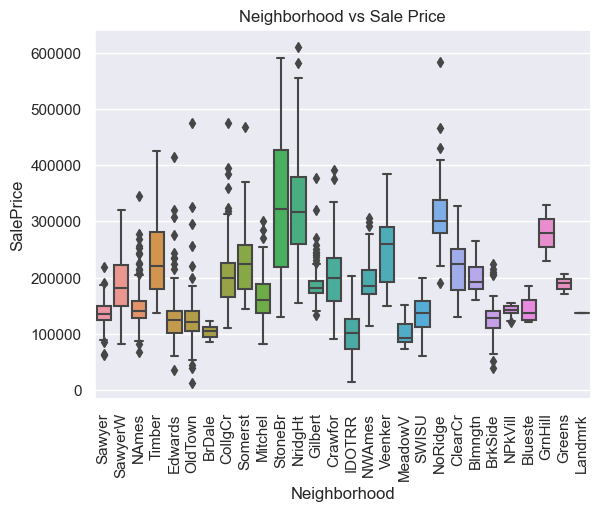

In [119]:
# Neighborhood
plt.xticks(rotation=90)
sns.boxplot(data=hse_rc, x='Neighborhood', y='SalePrice')
plt.title("Neighborhood vs Sale Price")
hse_rc['Neighborhood'].value_counts()

Norm      1761
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64

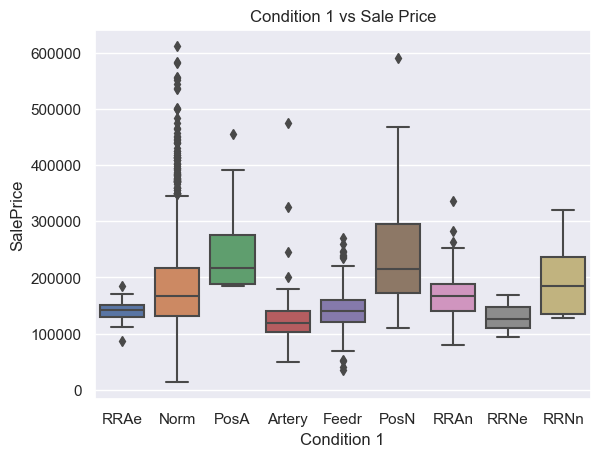

In [120]:
# Condition 1
sns.boxplot(data=hse_rc, x='Condition 1', y='SalePrice')
plt.title("Condition 1 vs Sale Price")
hse_rc['Condition 1'].value_counts()

Norm      2018
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition 2, dtype: int64

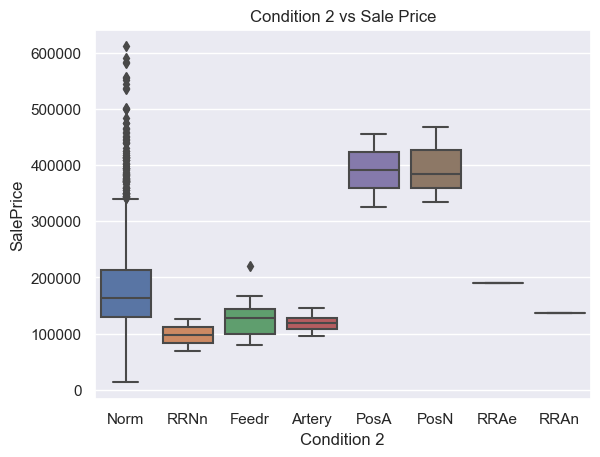

In [121]:
# Condition 2
sns.boxplot(data=hse_rc, x='Condition 2', y='SalePrice')
plt.title("Condition 2 vs Sale Price")
hse_rc['Condition 2'].value_counts()

1Fam      1693
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64

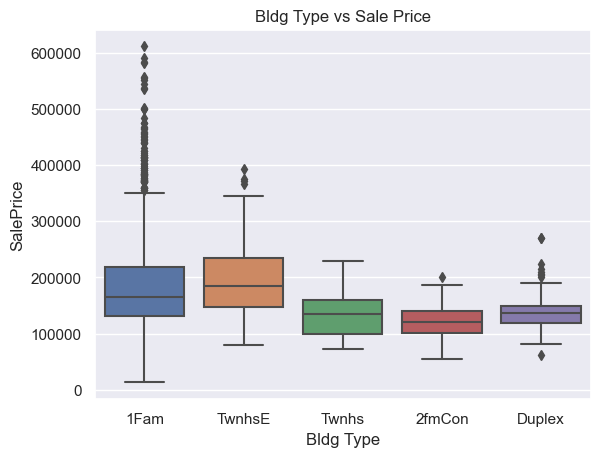

In [122]:
# Bldg Type
sns.boxplot(data=hse_rc, x='Bldg Type', y='SalePrice')
plt.title("Bldg Type vs Sale Price")
hse_rc['Bldg Type'].value_counts()

1Story    1055
2Story     595
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64

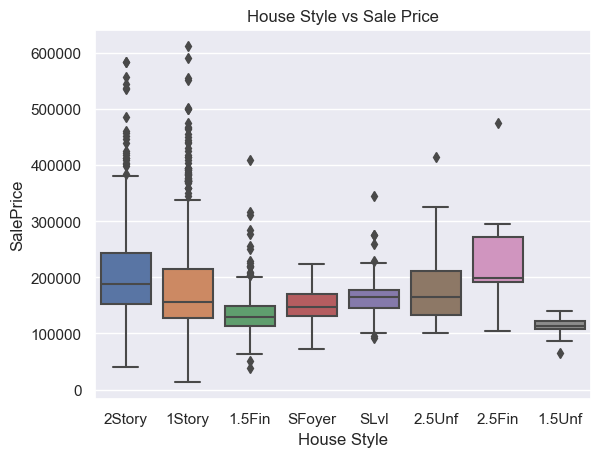

In [123]:
# House Style
sns.boxplot(data=hse_rc, x='House Style', y='SalePrice')
plt.title("House Style vs Sale Price")
hse_rc['House Style'].value_counts()

Gable      1613
Hip         396
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64

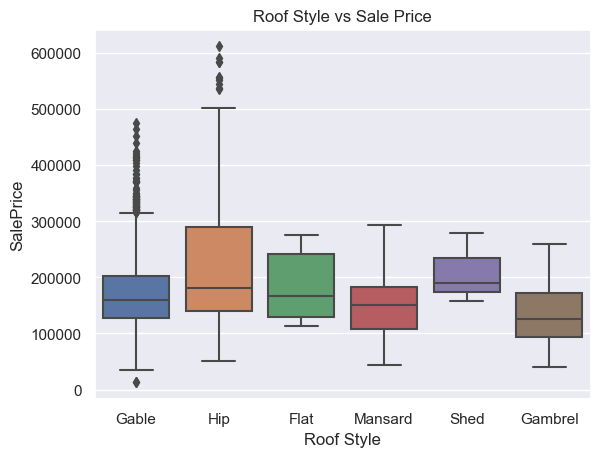

In [124]:
# Roof Style
sns.boxplot(data=hse_rc, x='Roof Style', y='SalePrice')
plt.title("Roof Style vs Sale Price")
hse_rc['Roof Style'].value_counts()

CompShg    2018
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

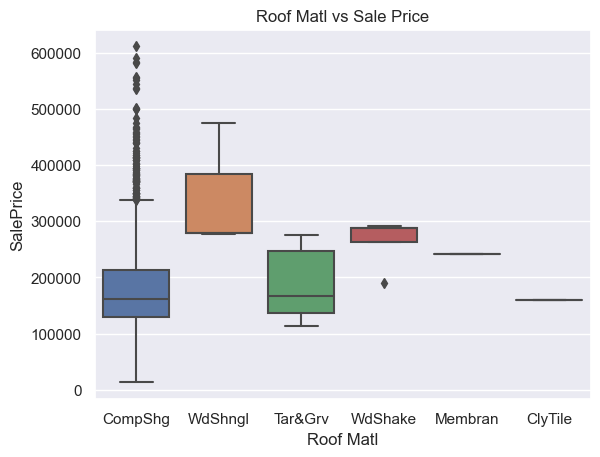

In [125]:
# Roof Matl
sns.boxplot(data=hse_rc, x='Roof Matl', y='SalePrice')
plt.title("Roof Matl vs Sale Price")
hse_rc['Roof Matl'].value_counts()

VinylSd    720
MetalSd    330
HdBoard    300
Wd Sdng    275
Plywood    151
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64

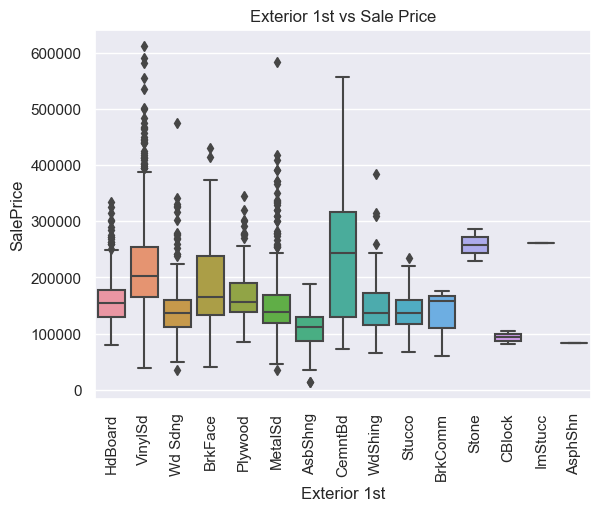

In [126]:
# Exterior 1st
plt.xticks(rotation=90)
sns.boxplot(data=hse_rc, x='Exterior 1st', y='SalePrice')
plt.title("Exterior 1st vs Sale Price")
hse_rc['Exterior 1st'].value_counts()

VinylSd    717
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    183
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       1
Name: Exterior 2nd, dtype: int64

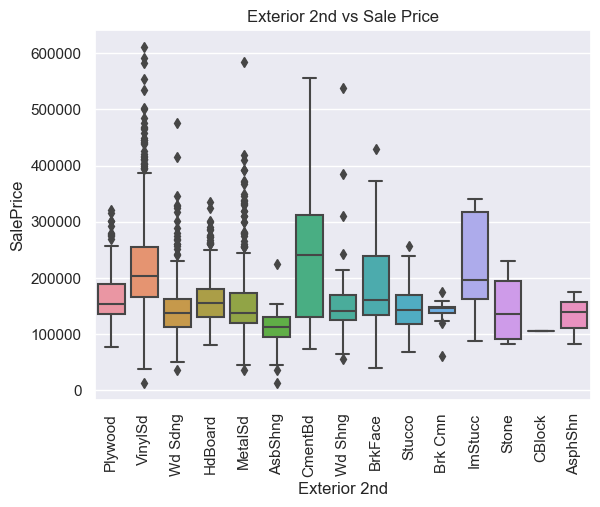

In [127]:
# Exterior 2nd
plt.xticks(rotation=90)
sns.boxplot(data=hse_rc, x='Exterior 2nd', y='SalePrice')
plt.title("Exterior 2nd vs Sale Price")
hse_rc['Exterior 2nd'].value_counts()

None       1235
BrkFace     628
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

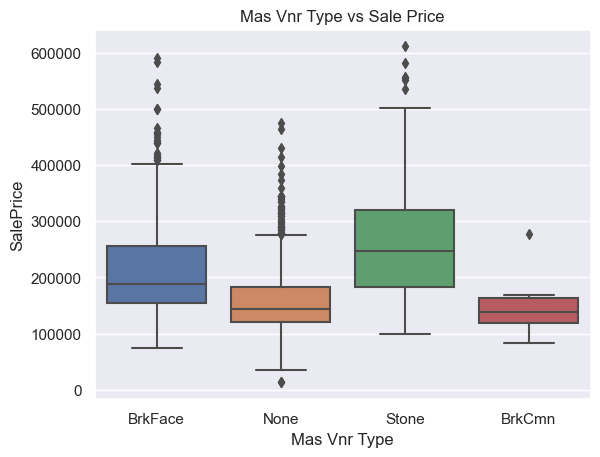

In [128]:
# Mas Vnr Type
sns.boxplot(data=hse_rc, x='Mas Vnr Type', y='SalePrice')
plt.title("Mas Vnr Type vs Sale Price")
hse_rc['Mas Vnr Type'].value_counts()

PConc     922
CBlock    862
BrkTil    220
Slab       33
Stone       5
Wood        2
Name: Foundation, dtype: int64

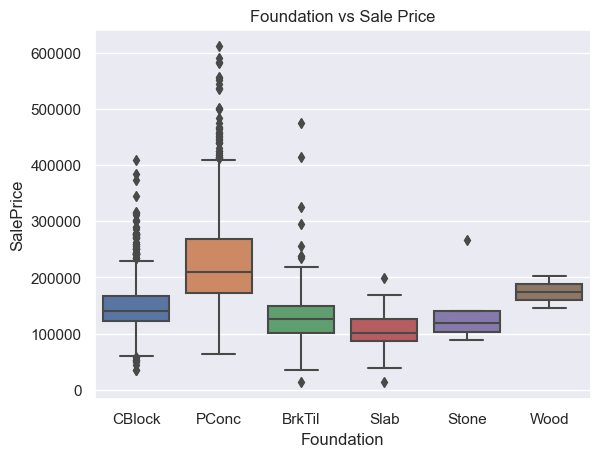

In [129]:
# Foundation
sns.boxplot(data=hse_rc, x='Foundation', y='SalePrice')
plt.title("Foundation vs Sale Price")
hse_rc['Foundation'].value_counts()

GasA    2011
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

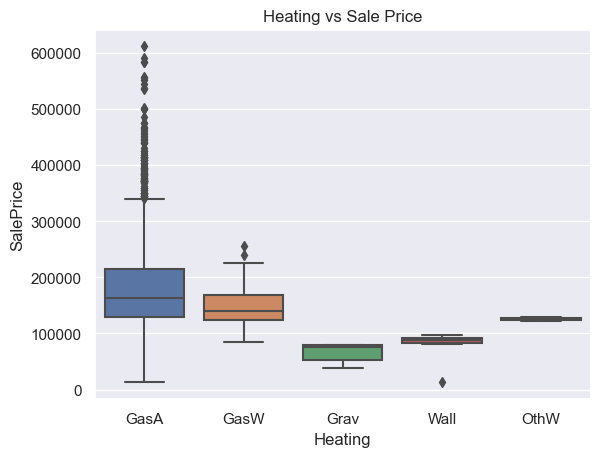

In [130]:
# Heating
sns.boxplot(data=hse_rc, x='Heating', y='SalePrice')
plt.title("Heating vs Sale Price")
hse_rc['Heating'].value_counts()

Y    1903
N     141
Name: Central Air, dtype: int64

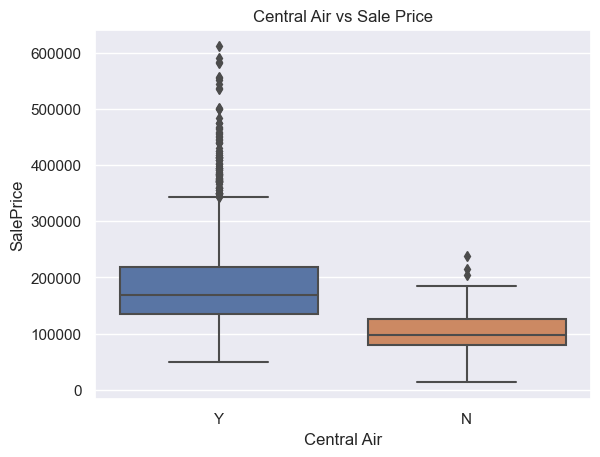

In [131]:
# Central Air
sns.boxplot(data=hse_rc, x='Central Air', y='SalePrice')
plt.title("Central Air vs Sale Price")
hse_rc['Central Air'].value_counts()

Attchd     1208
Detchd      534
BuiltIn     132
None        113
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

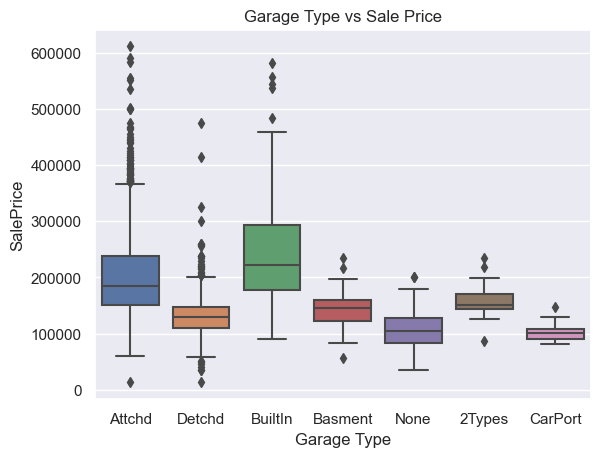

In [132]:
# Garage Type
sns.boxplot(data=hse_rc, x='Garage Type', y='SalePrice')
plt.title("Garage Type vs Sale Price")
hse_rc['Garage Type'].value_counts()

None    1979
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

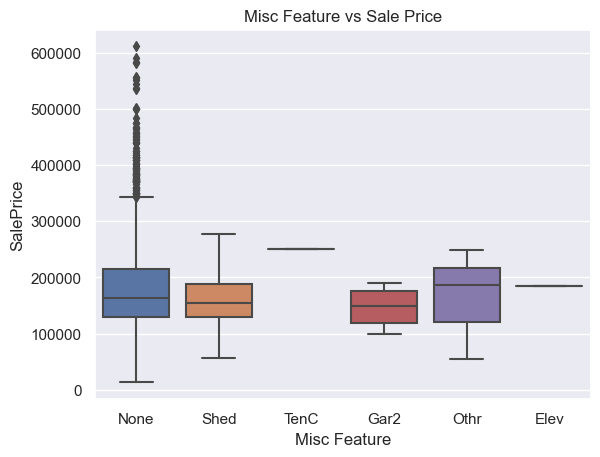

In [133]:
# Misc Feature
sns.boxplot(data=hse_rc, x='Misc Feature',y='SalePrice')
plt.title("Misc Feature vs Sale Price")
hse_rc['Misc Feature'].value_counts()

WD       1777
New       158
COD        63
ConLD      16
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64

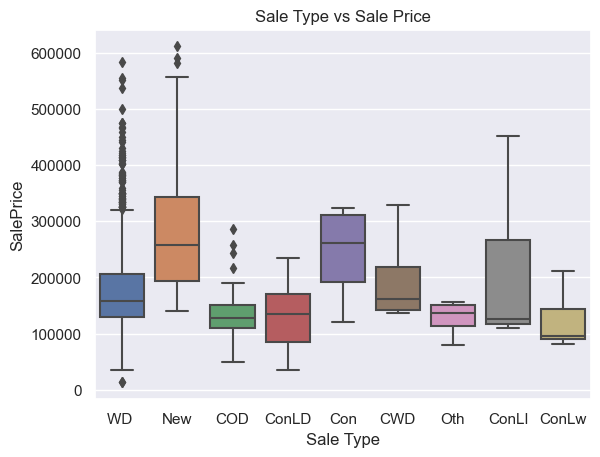

In [134]:
# Sale Type
sns.boxplot(data=hse_rc, x='Sale Type',y='SalePrice')
plt.title("Sale Type vs Sale Price")
hse_rc['Sale Type'].value_counts()

From the Categorical Nominal Variables, we can see that there are variations versus the SalePrice which can be used in our Models.

#### Ordinal Variables

Taking a look into the Ordinal Variables
- Lot Shape
- Utilites
- Overall Qual
- Overall Cond
- Land Slope
- Exter Qual
- Exter Cond
- Bsmt Qual
- Bsmt Cond
- Bsmt Exposure
- BsmtFin Type 1
- BsmtFin Type 2
- Heating QC
- Electrical
- Kitchen Qual
- Functional
- Fireplace Qu
- Garage Finish
- Garage Qual
- Garage Cond
- Paved Drive
- Pool QC
- Fence

Reg    1292
IR1     688
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

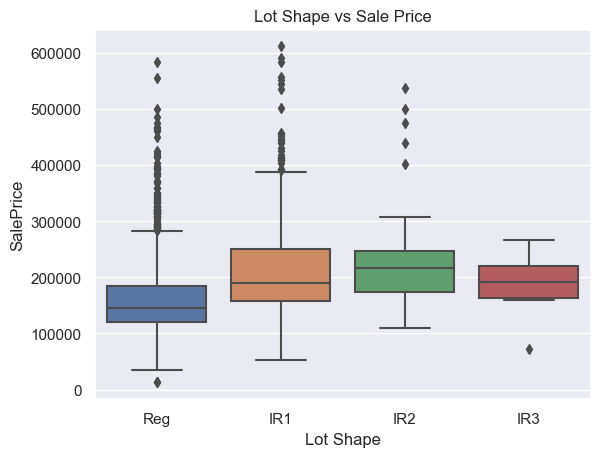

In [135]:
# Lot Shape
sns.boxplot(data=hse_rc, x='Lot Shape', y='SalePrice', order = ['Reg', 'IR1', 'IR2', 'IR3'])
plt.title("Lot Shape vs Sale Price")
hse_rc['Lot Shape'].value_counts()

AllPub    2042
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

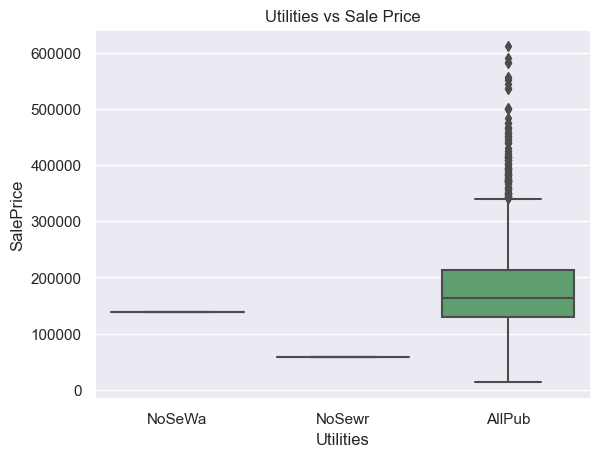

In [136]:
# Utilites
sns.boxplot(data=hse_rc, x='Utilities', y='SalePrice', order = ['NoSeWa', 'NoSewr', 'AllPub'])
plt.title("Utilities vs Sale Price")
hse_rc['Utilities'].value_counts()

Gtl    1946
Mod      88
Sev      10
Name: Land Slope, dtype: int64

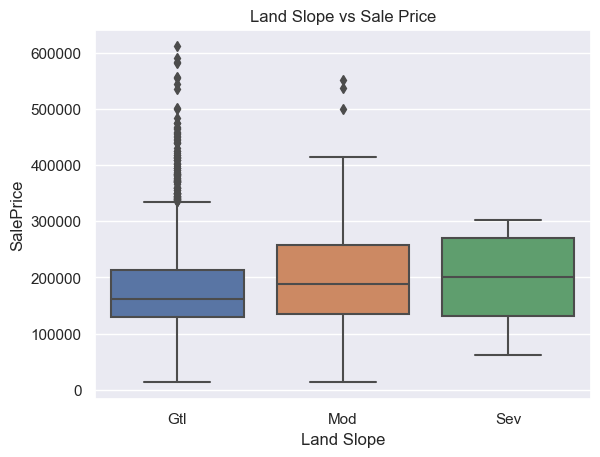

In [137]:
# Land Slope
sns.boxplot(data=hse_rc, x='Land Slope', y='SalePrice', order=['Gtl','Mod','Sev'])
plt.title("Land Slope vs Sale Price")
hse_rc['Land Slope'].value_counts()

5     560
6     506
7     430
8     248
4     158
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64

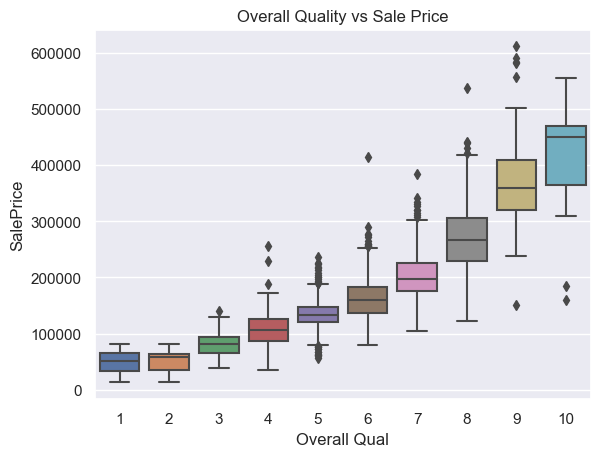

In [138]:
# Overall Qual
sns.boxplot(data=hse_rc, x='Overall Qual', y='SalePrice')
plt.title("Overall Quality vs Sale Price")
hse_rc['Overall Qual'].value_counts()

5    1164
6     367
7     268
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

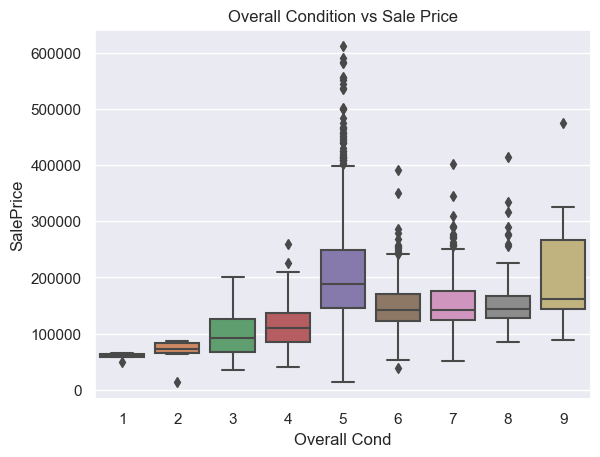

In [139]:
# Overall Cond
sns.boxplot(data=hse_rc, x='Overall Cond', y='SalePrice')
plt.title("Overall Condition vs Sale Price")
hse_rc['Overall Cond'].value_counts()

TA    1244
Gd     693
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

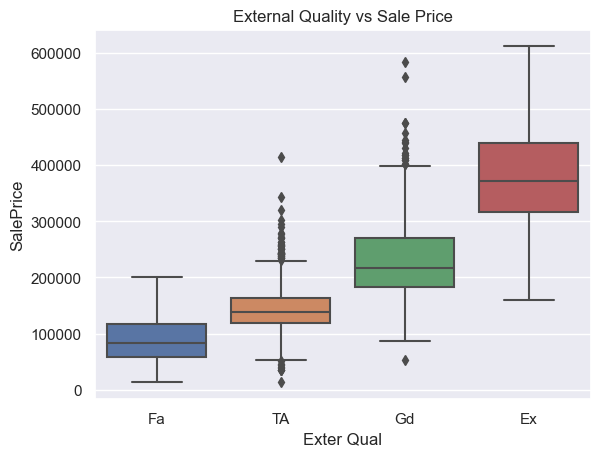

In [140]:
# Exter Qual
sns.boxplot(data=hse_rc, x='Exter Qual', y='SalePrice', order=['Fa','TA','Gd','Ex'])
plt.title("External Quality vs Sale Price")
hse_rc['Exter Qual'].value_counts()

TA    1771
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

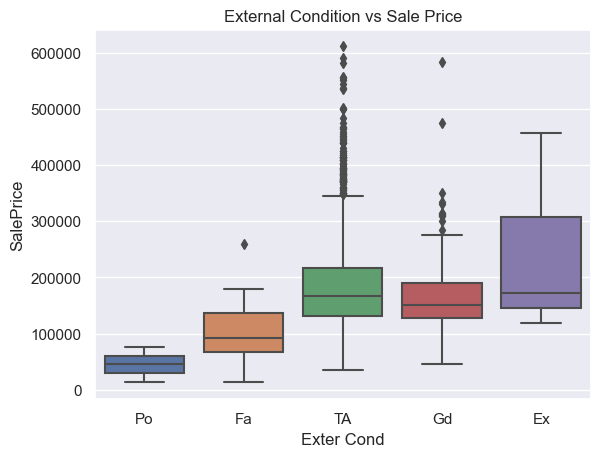

In [141]:
# Exter Cond
sns.boxplot(data=hse_rc, x='Exter Cond', y='SalePrice', order=['Po','Fa','TA','Gd','Ex'])
plt.title("External Condition vs Sale Price")
hse_rc['Exter Cond'].value_counts()

TA      887
Gd      859
Ex      184
Fa       60
None     53
Po        1
Name: Bsmt Qual, dtype: int64

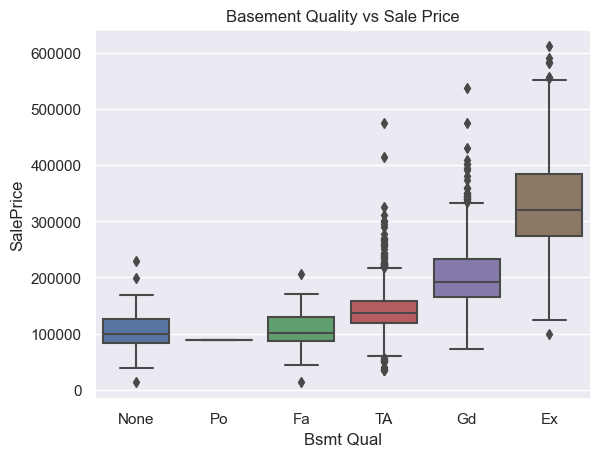

In [142]:
# Bsmt Qual
sns.boxplot(data=hse_rc, x='Bsmt Qual', y='SalePrice', order=['None','Po','Fa','TA','Gd','Ex'])
plt.title("Basement Quality vs Sale Price")
hse_rc['Bsmt Qual'].value_counts()

TA      1829
Gd        89
Fa        65
None      53
Po         5
Ex         3
Name: Bsmt Cond, dtype: int64

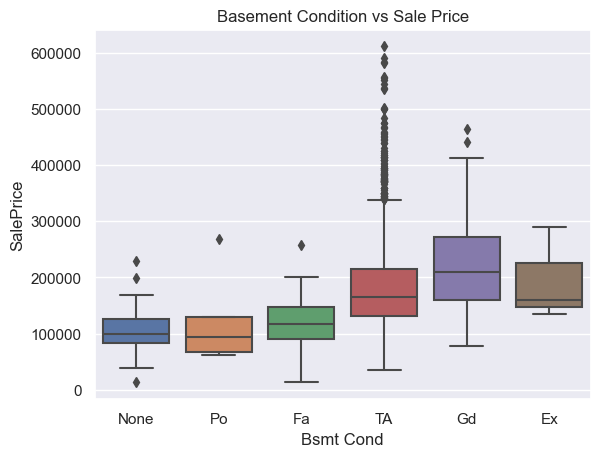

In [143]:
# Bsmt Cond
sns.boxplot(data=hse_rc, x='Bsmt Cond', y='SalePrice',order=['None','Po','Fa','TA','Gd','Ex'])
plt.title("Basement Condition vs Sale Price")
hse_rc['Bsmt Cond'].value_counts()

No      1338
Av       287
Gd       203
Mn       163
None      53
Name: Bsmt Exposure, dtype: int64

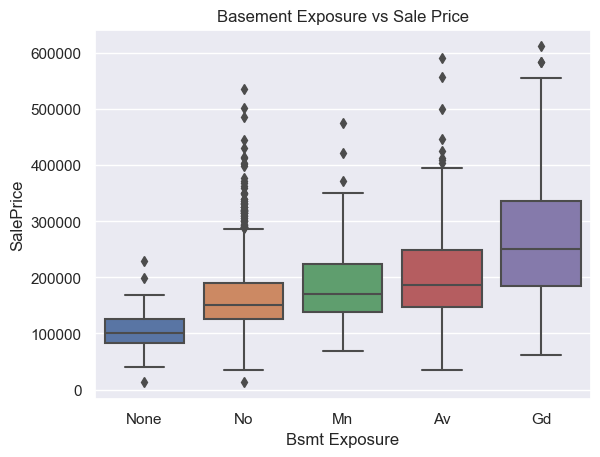

In [144]:
# Bsmt Exposure
sns.boxplot(data=hse_rc, x='Bsmt Exposure', y='SalePrice',order=['None','No','Mn','Av','Gd'])
plt.title("Basement Exposure vs Sale Price")
hse_rc['Bsmt Exposure'].value_counts()

GLQ     614
Unf     600
ALQ     292
BLQ     200
Rec     183
LwQ     102
None     53
Name: BsmtFin Type 1, dtype: int64

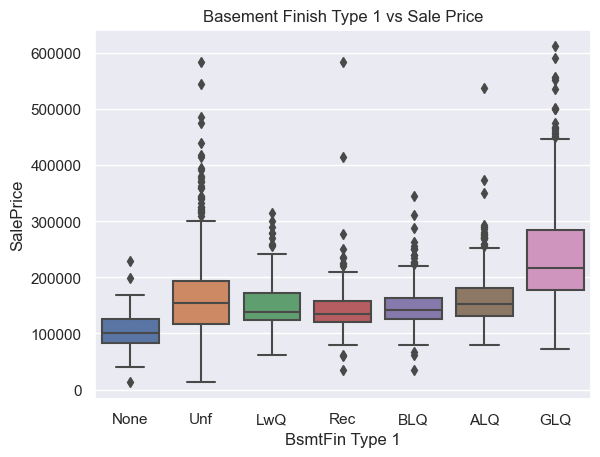

In [145]:
# BsmtFin Type 1
sns.boxplot(data=hse_rc, x='BsmtFin Type 1', y='SalePrice',order=['None','Unf','LwQ','Rec','BLQ','ALQ',
                                                                  'GLQ'])
plt.title("Basement Finish Type 1 vs Sale Price")
hse_rc['BsmtFin Type 1'].value_counts()

Unf     1744
Rec       80
LwQ       60
None      54
BLQ       48
ALQ       35
GLQ       23
Name: BsmtFin Type 2, dtype: int64

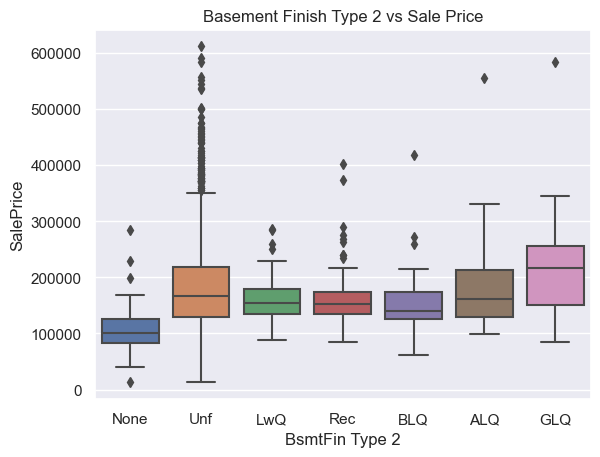

In [146]:
# BsmtFin Type 2
sns.boxplot(data=hse_rc, x='BsmtFin Type 2', y='SalePrice',order=['None','Unf','LwQ','Rec','BLQ','ALQ',
                                                                  'GLQ'])
plt.title("Basement Finish Type 2 vs Sale Price")
hse_rc['BsmtFin Type 2'].value_counts()

Ex    1060
TA     595
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

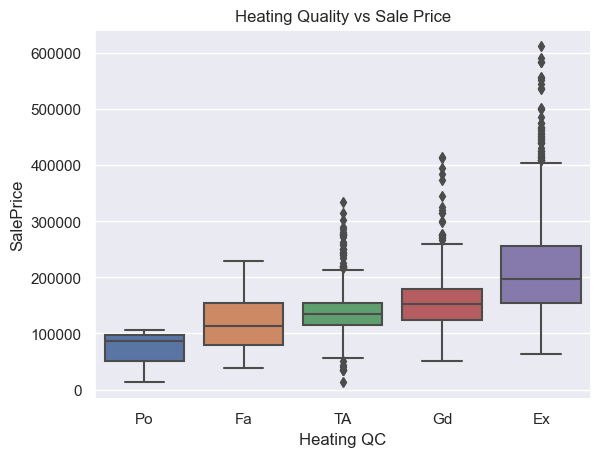

In [147]:
# Heating QC
sns.boxplot(data=hse_rc, x='Heating QC', y='SalePrice',order=['Po','Fa','TA','Gd','Ex'])
plt.title("Heating Quality vs Sale Price")
hse_rc['Heating QC'].value_counts()

SBrkr    1862
FuseA     139
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

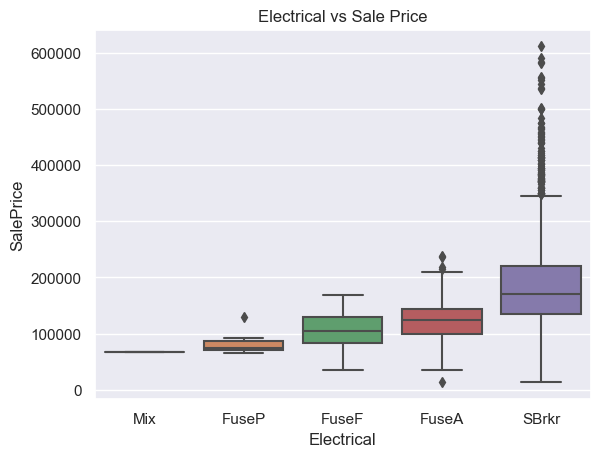

In [148]:
# Electrical
sns.boxplot(data=hse_rc, x='Electrical', y='SalePrice',order=['Mix','FuseP','FuseF','FuseA','SBrkr'])
plt.title("Electrical vs Sale Price")
hse_rc['Electrical'].value_counts()

TA    1046
Gd     802
Ex     149
Fa      47
Name: Kitchen Qual, dtype: int64

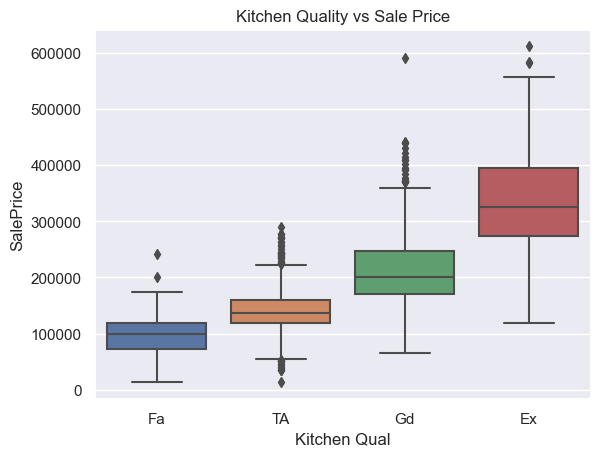

In [149]:
# Kitchen Qual
sns.boxplot(data=hse_rc, x='Kitchen Qual', y='SalePrice',order=['Fa','TA','Gd','Ex'])
plt.title("Kitchen Quality vs Sale Price")
hse_rc['Kitchen Qual'].value_counts()

6     594
7     474
5     407
8     227
4     145
9      98
10     49
11     21
12     13
3      12
14      1
2       1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64

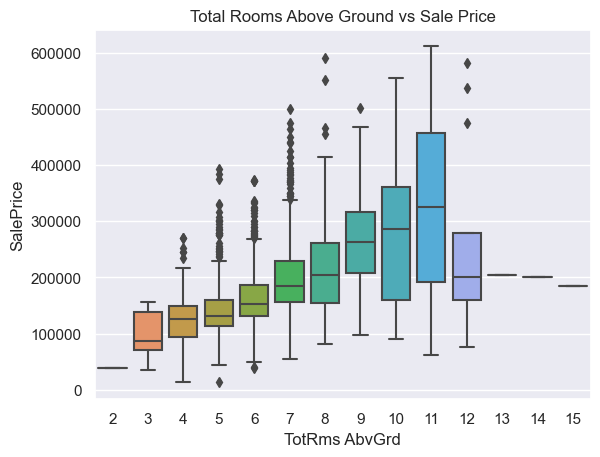

In [150]:
# TotRms AbvGrd
sns.boxplot(data=hse_rc, x='TotRms AbvGrd', y='SalePrice')
plt.title("Total Rooms Above Ground vs Sale Price")
hse_rc['TotRms AbvGrd'].value_counts()

Typ     1908
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

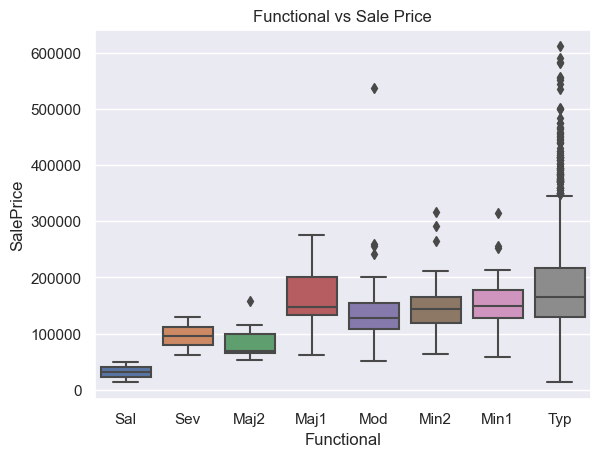

In [151]:
# Functional
sns.boxplot(data=hse_rc, x='Functional', y='SalePrice', order=['Sal','Sev','Maj2','Maj1','Mod','Min2',
                                                               'Min1','Typ'])
plt.title("Functional vs Sale Price")
hse_rc['Functional'].value_counts()

None    997
Gd      520
TA      406
Fa       59
Po       31
Ex       31
Name: Fireplace Qu, dtype: int64

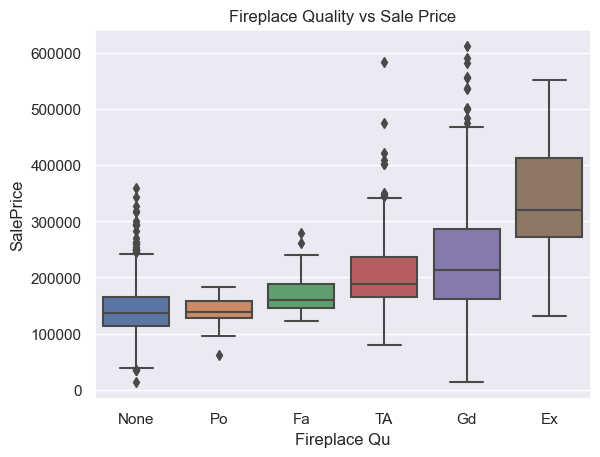

In [152]:
# Fireplace Qu
sns.boxplot(data=hse_rc, x='Fireplace Qu', y='SalePrice', order=['None','Po','Fa','TA','Gd','Ex'])
plt.title("Fireplace Quality vs Sale Price")
hse_rc['Fireplace Qu'].value_counts()

Unf     846
RFn     576
Fin     509
None    113
Name: Garage Finish, dtype: int64

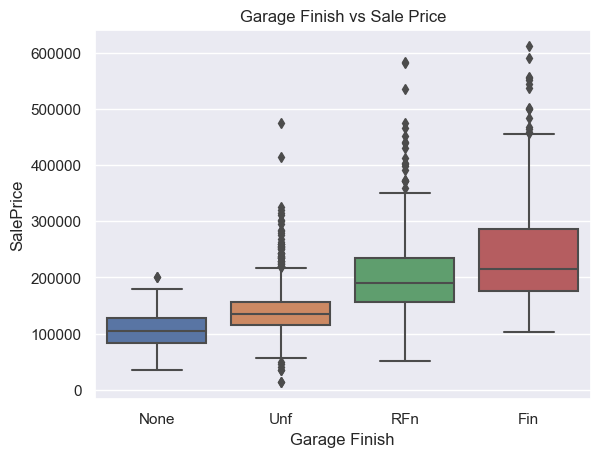

In [153]:
# Garage Finish
sns.boxplot(data=hse_rc, x='Garage Finish', y='SalePrice',order=['None','Unf','RFn','Fin'])
plt.title("Garage Finish vs Sale Price")
hse_rc['Garage Finish'].value_counts()

TA      1826
None     113
Fa        82
Gd        18
Ex         3
Po         2
Name: Garage Qual, dtype: int64

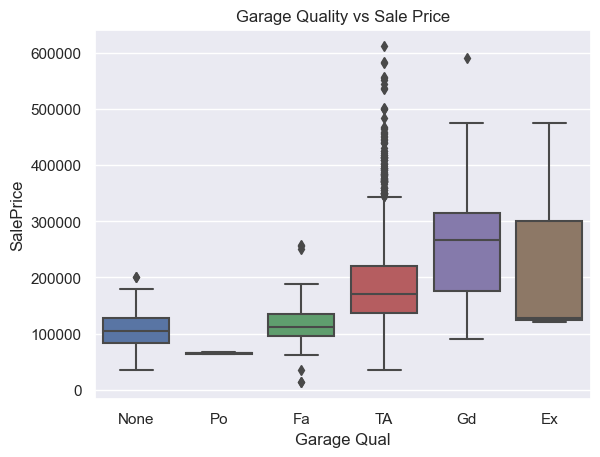

In [154]:
# Garage Qual
sns.boxplot(data=hse_rc, x='Garage Qual', y='SalePrice',order=['None','Po','Fa','TA','Gd','Ex'])
plt.title("Garage Quality vs Sale Price")
hse_rc['Garage Qual'].value_counts()

TA      1862
None     113
Fa        47
Gd        12
Po         8
Ex         2
Name: Garage Cond, dtype: int64

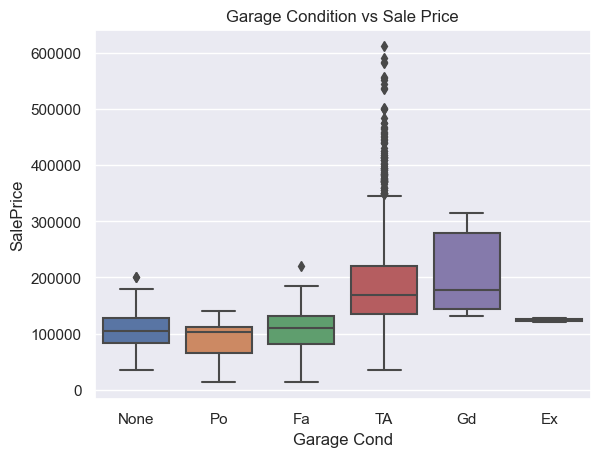

In [155]:
# Garage Cond
sns.boxplot(data=hse_rc, x='Garage Cond', y='SalePrice',order=['None','Po','Fa','TA','Gd','Ex'])
plt.title("Garage Condition vs Sale Price")
hse_rc['Garage Cond'].value_counts()

Y    1854
N     151
P      39
Name: Paved Drive, dtype: int64

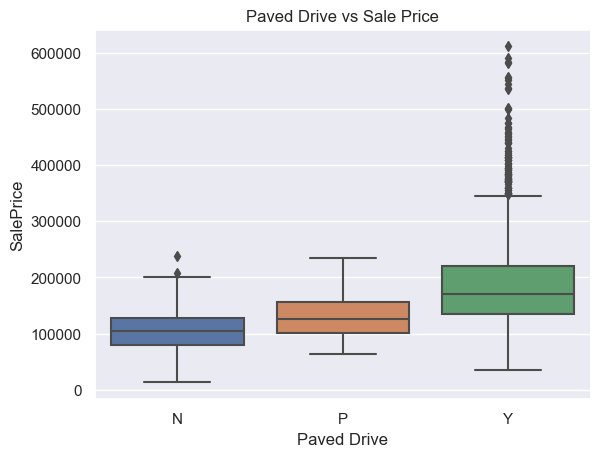

In [156]:
# Paved Drive
sns.boxplot(data=hse_rc, x='Paved Drive', y='SalePrice',order=['N','P','Y'])
plt.title("Paved Drive vs Sale Price")
hse_rc['Paved Drive'].value_counts()

None    2035
Gd         4
Fa         2
TA         2
Ex         1
Name: Pool QC, dtype: int64

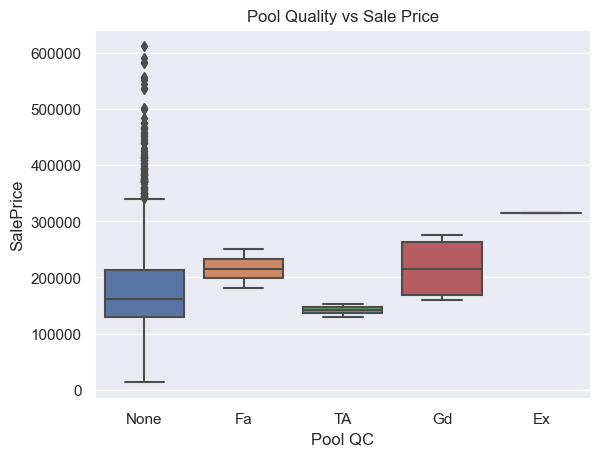

In [157]:
# Pool QC
sns.boxplot(data=hse_rc, x='Pool QC',y='SalePrice',order=['None','Fa','TA','Gd','Ex'])
plt.title("Pool Quality vs Sale Price")
hse_rc['Pool QC'].value_counts()

None     1646
MnPrv     225
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

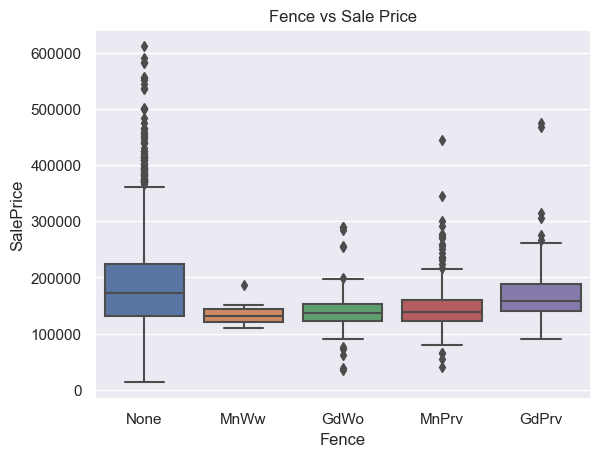

In [158]:
# Fence
sns.boxplot(data=hse_rc, x='Fence',y='SalePrice', order=['None','MnWw','GdWo','MnPrv','GdPrv'])
plt.title("Fence vs Sale Price")
hse_rc['Fence'].value_counts()

Observations on Ordinal Variables

- Most of the ordinal variables seems to indicate there is a relationship with the Sale Price with the order.
- There are three columns that does not have much variation.
- Lot Shape
- Utilities
- Fence

##### Ordinal Variables - Ordinal Encoding

In [159]:
# Create a dictionary sequence for ordinal variables mapping
ordinal_cols_mapping = [{
    'col':'Lot Shape',
    'mapping': {
        'Reg': 3,
        'IR1': 2,
        'IR2': 1,
        'IR3': 0,
    }}, { 
    'col':'Utilities',
    'mapping': {
        'ELO': 0,
        'NoSeWa': 1,
        'NoSewr': 2,
        'AllPub': 3
    }}, {   
    'col':'Land Slope',
    'mapping': {
        'Gtl': 2,
        'Mod': 1,
        'Sev': 0
    }}, {   
     'col': 'Exter Qual',
    'mapping': {
        'Ex': 4,
        'Gd': 3, 
        'TA': 2,
        'Fa': 1,
        'Po': 0,
    }}, {
    'col': 'Exter Cond',
    'mapping': {
        'Ex': 4,
        'Gd': 3, 
        'TA': 2,
        'Fa': 1,
        'Po': 0,
    }}, {      
        'col': 'Bsmt Qual',
    "mapping": {
        'Ex': 5,
        'Gd':4, 
        'TA':3,
        'Fa':2,
        'Po':1,
        'None':0,
    }}, {
    'col': 'Bsmt Cond',
    'mapping': {
        'Ex': 5,
        'Gd':4, 
        'TA':3,
        'Fa':2,
        'Po':1,
        'None':0,
    }}, {
    'col':'Bsmt Exposure',
    'mapping': {
        'None': 0,
        'No': 1,
        'Mn': 2,
        'Av': 3,
        'Gd': 4,
    }}, {
    'col':'BsmtFin Type 1',
    'mapping': {
        'None': 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6
    }}, {
    'col':'BsmtFin Type 2',
    'mapping': {
        'None': 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6,
    }}, {
    'col': 'Heating QC',
    'mapping': {
        'None':0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4, 
        'Ex': 5,
    }}, {
    'col':'Electrical',
    'mapping': {
        'Mix': 0,
        'FuseP': 1,
        'FuseF': 2,
        'FuseA': 3,
        'SBrkr': 4
    }}, {
    'col': 'Kitchen Qual',
    'mapping': {
        'Ex': 5,
        'Gd': 4, 
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'None':0,
    }}, {
    'col':'Functional',
    'mapping': {
        'Sal': 0,
        'Sev': 1,
        'Maj2': 2,
        'Maj1': 3,
        'Mod': 4,
        'Min2': 5,
        'Min1': 6,
        'Typ': 7
    }}, {   
    'col': 'Fireplace Qu',
    'mapping': {
        'Ex': 5,
        'Gd':4, 
        'TA':3,
        'Fa':2,
        'Po':1,
        'None':0,
    }}, {
    'col':'Garage Finish',
    'mapping': {
        'Fin': 3,
        'RFn': 2,
        'Unf': 1,
        'None': 0,
    }}, {
    "col": 'Garage Qual',
    'mapping': {
        'Ex': 5,
        'Gd':4, 
        'TA':3,
        'Fa':2,
        'Po':1,
        'None':0,
    }}, {
    "col": 'Garage Cond',
    'mapping': {
        'Ex': 5,
        'Gd':4, 
        'TA':3,
        'Fa':2,
        'Po':1,
        'None':0,
    }}, {
    'col':'Paved Drive',
    'mapping': {
        'N': 0,
        'P': 1,
        'Y': 2,
    }}, {
    'col': 'Pool QC',
    'mapping': {
        'Ex':4,
        'Gd':3, 
        'TA':2,
        'Fa':1,
        'None':0
    }}, {
    'col': 'Fence',
    'mapping': {
        'GdPrv':4,
        'MnPrv':3,
        'GdWo':2,
        'MnWw':1,
        'None':0
    }},

]

In [160]:
# Using OrdinalEncoder to encode and map the ordinal columns
encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
                             return_df = True)

hse_rc_encoded = encoder.fit_transform(hse_rc.drop(['SalePrice'],axis=1))

In [161]:
hse_rc_encoded['SalePrice'] = hse_rc['SalePrice']

In [162]:
hse_rc_encoded

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL          60.0     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL          60.0     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley  Lot Shape Land Contour  ...  Screen Porch Pool Area  Pool QC  \
0     None          2          Lvl  ...             0         0        0   
1     None          2          Lvl  ...             0         0        0   
2     None          3          Lvl  ...             0         0        0   
3     None          3          Lvl  ...             0         0        0   
4     None          2          Lvl  ...             0         0        0   
...    ...        ...          ...  ...           ...       ...      ...   
2046  None          2          HLS  ...             0         0        0   
2047  None          2          Lvl  ...             0         0        0   
2048  None          3          Bnk  ...             0         0        0   
2049  None          3          Lvl  ...             0         0        0   
2050  None          3          Lvl  ...             0         0        0   

     Fence Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0        0         None        0       3    2010        WD      130500  
1        0         None        0       4    2009        WD      220000  
2        0         None        0       1    2010        WD      109000  
3        0         None        0       4    2010        WD      174000  
4        0         None        0       3    2010        WD      138500  
...    ...          ...      ...     ...     ...        ...        ...  
2046     0         None        0       1    2008        WD      298751  
2047     0         None        0       3    2009        WD       82500  
2048     0         None        0       3    2009        WD      177000  
2049     0         None        0      11    2009        WD      144000  
2050     0         None        0       6    2010        WD      189000  

[2044 rows x 81 columns]

In [163]:
hse_rc_encoded.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\7393081.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(corr.corr()),annot=True, linewidth=.3)


<AxesSubplot: >

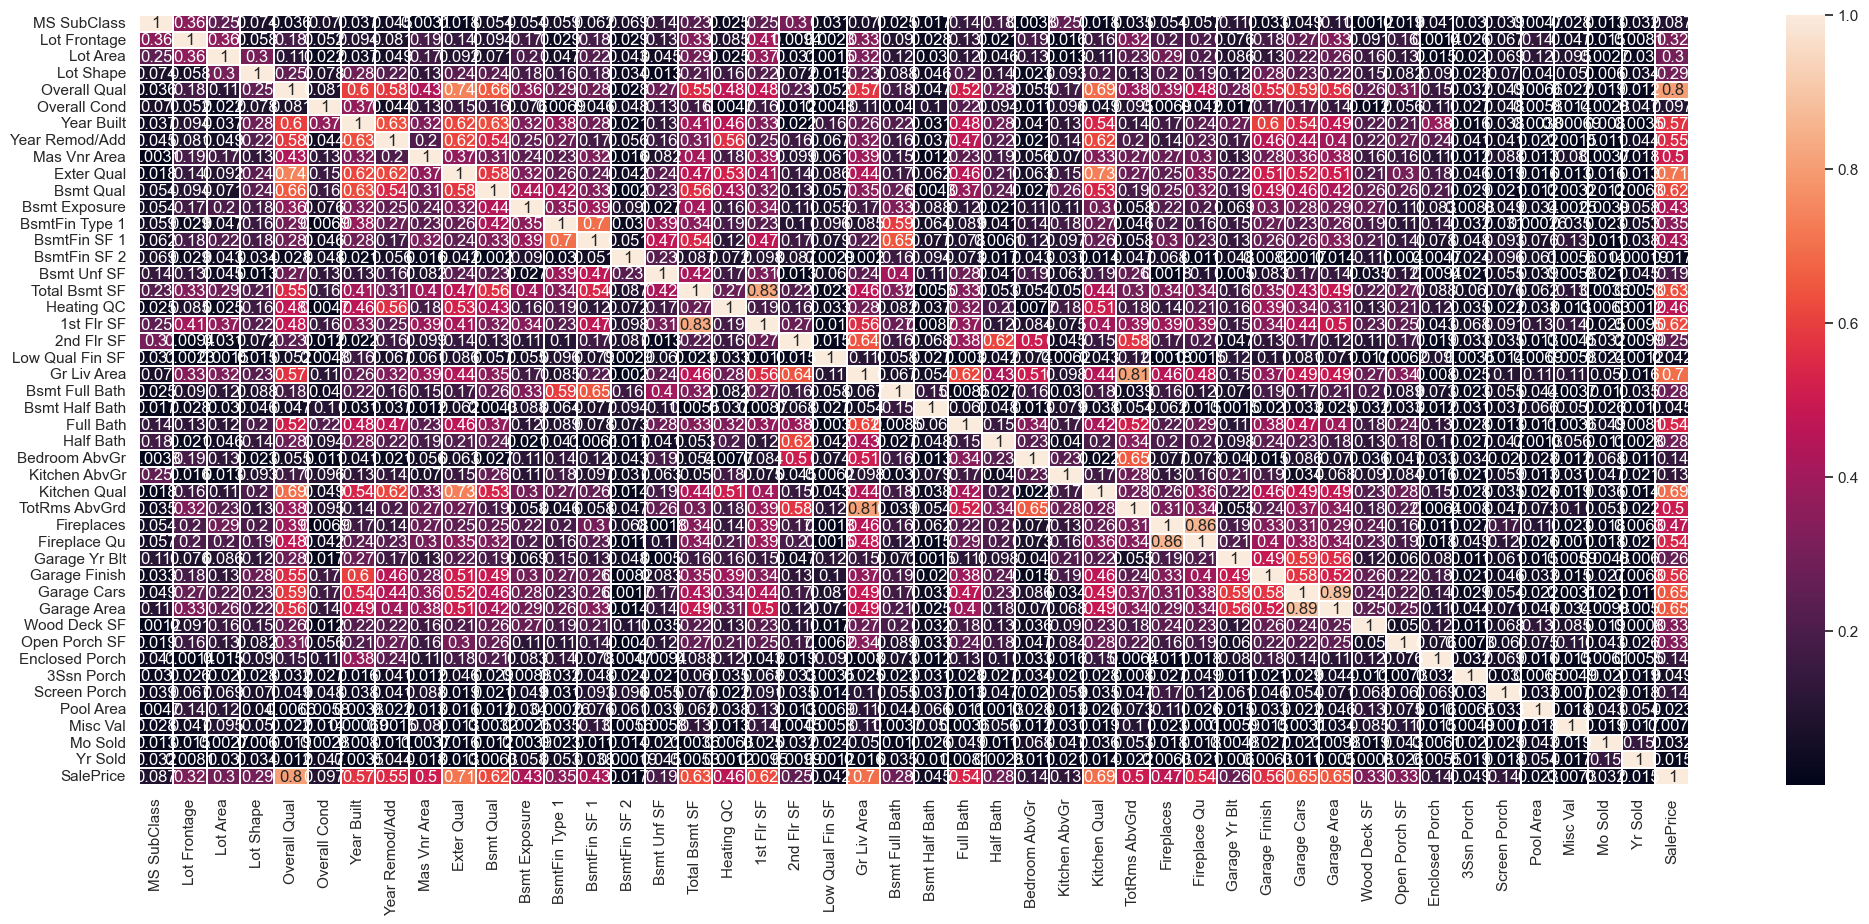

In [164]:
corr = hse_rc_encoded.drop(['Id','PID','Alley','Land Contour','Utilities','Land Slope', 
                        'Condition 1','Condition 2','Bldg Type','Exter Cond', 'Bsmt Cond', 'BsmtFin Type 2',
                        'Heating','Central Air','Electrical','Functional','Garage Qual','Garage Cond',
                        'Paved Drive','Pool QC','Fence','Misc Feature','Sale Type'], axis =1)

plt.figure(figsize = (25,10))
sns.heatmap(abs(corr.corr()),annot=True, linewidth=.3)

### Feature Engineering

- Some of the features should be combined due to multicollinearity which should be combined to prevent overfitting

#### Overall

Overall Qual * Overall Cond

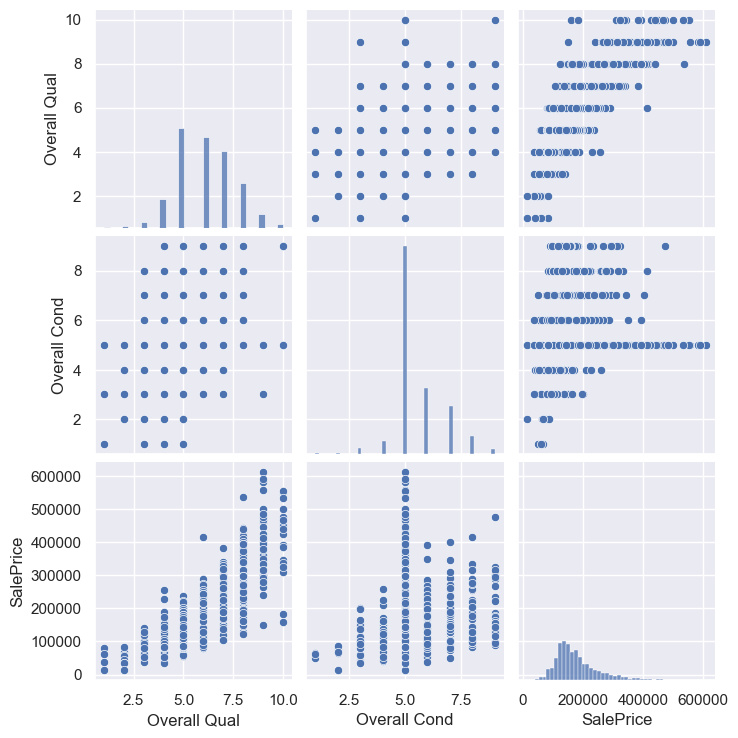

In [165]:
sns.pairplot(hse_rc[['Overall Qual', 'Overall Cond', 'SalePrice']])

In [166]:
(hse_rc_encoded['Overall Qual'] ).corr(hse_rc_encoded['SalePrice'])

0.8012466598451994

In [167]:
(hse_rc_encoded['Overall Cond'] ).corr(hse_rc_encoded['SalePrice'])

-0.09665466813510912

In [168]:
(hse_rc_encoded['Overall Qual'] * hse_rc_encoded['Overall Cond']).corr(hse_rc_encoded['SalePrice'])

0.5653832732779344

In [169]:
hse_rc_encoded['Overall'] = hse_rc_encoded['Overall Qual'] * hse_rc_encoded['Overall Cond']
hse_rc_encoded = hse_rc_encoded.drop(['Overall Qual','Overall Cond'],axis=1)

Text(0.5, 1.0, 'Overall vs Sale Price')

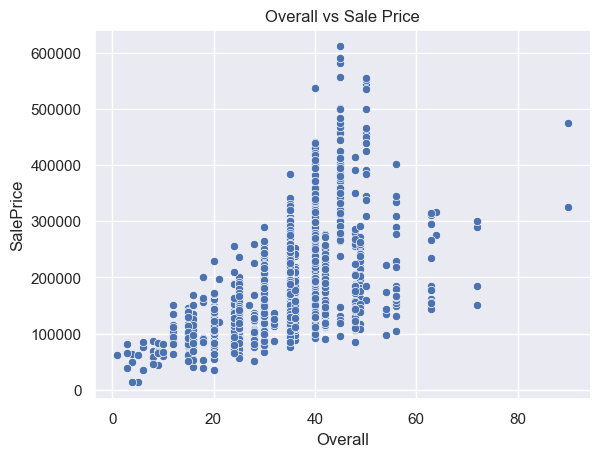

In [170]:
sns.scatterplot(x=hse_rc_encoded['Overall'],y=hse_rc_encoded['SalePrice'])
plt.title("Overall vs Sale Price")

Although from just looking at the correlation values we see that Overall Condition has poor correlinarity with SalePrice, we can see from the plot that actually it has a positive relation with the SalePrice. We can combine them as 1 feature. The 'Overall' vs 'SalePrice' plot still provides a good positive correlation. 

#### Above Area

1st Floor SF + 2nd Flr SF + 0.5*Low Qual Fin SF

In [171]:
hse_rc_encoded[['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']].tail(10)

1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area
2041        1572        1096                0         2668
2042         964           0              450         1414
2043         608         624                0         1232
2044         754         855                0         1609
2045        1932           0                0         1932
2046        1728           0                0         1728
2047         861           0                0          861
2048        1172         741                0         1913
2049        1200           0                0         1200
2050        1028         776                0         1804

In [172]:
(hse_rc_encoded['1st Flr SF']+ hse_rc_encoded['2nd Flr SF']).corr(hse_rc_encoded['SalePrice'])

0.7065233499452327

In [173]:
(hse_rc_encoded['1st Flr SF']+ hse_rc_encoded['2nd Flr SF'] + 
 0.5*hse_rc_encoded['Low Qual Fin SF']).corr(hse_rc['SalePrice'])

0.7032772646052554

In [174]:
hse_rc_encoded['AboveArea'] = (hse_rc_encoded['1st Flr SF']+ hse_rc_encoded['2nd Flr SF'] 
                            + 0.5*hse_rc_encoded['Low Qual Fin SF'])
hse_rc_encoded = hse_rc_encoded.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area'],axis=1)

Text(0.5, 1.0, 'Above Ground Living Area vs Sale Price')

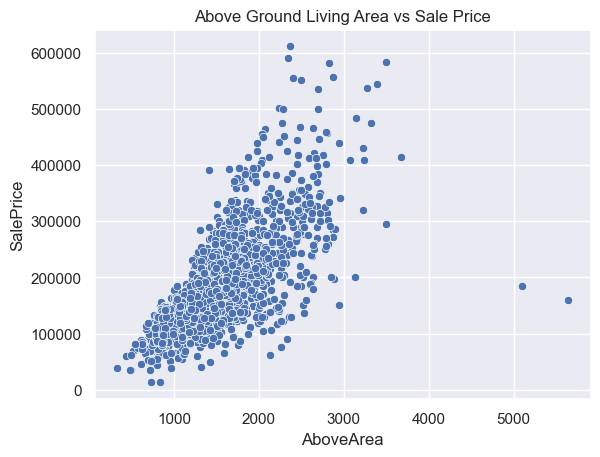

In [175]:
sns.scatterplot(x=hse_rc_encoded['AboveArea'],y=hse_rc_encoded['SalePrice'])
plt.title("Above Ground Living Area vs Sale Price")

In [176]:
hse_rc_encoded[hse_rc_encoded['AboveArea'] > 4000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
960   1499  908154235           60        RL         313.0     63887   Pave   
1885  2181  908154195           20        RL         128.0     39290   Pave   

     Alley  Lot Shape Land Contour  ...  Pool QC Fence  Misc Feature Misc Val  \
960   None          0          Bnk  ...        3     0          None        0   
1885  None          2          Bnk  ...        0     0          Elev    17000   

     Mo Sold Yr Sold Sale Type SalePrice  Overall  AboveArea  
960        1    2008       New    160000       50     5642.0  
1885      10    2007       New    183850       50     5095.0  

[2 rows x 77 columns]

In [177]:
hse_rc_encoded.drop([960,1885],axis = 0, inplace = True)

In [178]:
hse_rc_encoded[hse_rc_encoded['AboveArea'] > 4000]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, Overall, AboveArea]
Index: []

[0 rows x 77 columns]

We observe from the plot above that there are two points having higher values of AboveArea. These are considered outlier points and it will be removed.

We will combine the '1st Flr SF', '2nd Flr SF' and 'Low Qual Fin SF' to replace 'Gr Liv Area'. However, a similar benchmark for 'Low Qual Fin SF' cannot be given as compared to '1st Flr SF' and '2nd Flr SF'. We will impute a penalty of 0.5 of total value of 'Low Qual Fin SF'.

#### Total Bath

Bsmt Full Bath + 0.5 * Bsmt Half Bath + Full Bath + 0.5 * Half Bath

In [179]:
(hse_rc_encoded['Bsmt Full Bath']+ 0.5*hse_rc_encoded['Bsmt Half Bath'] + hse_rc_encoded['Full Bath'] 
 + 0.5*hse_rc_encoded['Half Bath']).corr(hse_rc_encoded['SalePrice'])

0.6322597901372765

In [180]:
hse_rc_encoded['TotalBath'] = (hse_rc_encoded['Bsmt Full Bath']+ 0.5*hse_rc_encoded['Bsmt Half Bath'] + 
                              hse_rc_encoded['Full Bath'] + 0.5*hse_rc_encoded['Half Bath'])
hse_rc_encoded = hse_rc_encoded.drop(['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],axis=1)

Text(0.5, 1.0, 'Total Bath vs Sale Price')

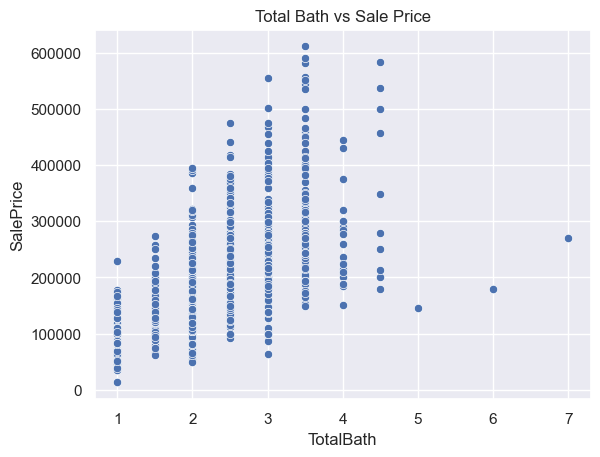

In [181]:
sns.scatterplot(x=hse_rc_encoded['TotalBath'],y=hse_rc_encoded['SalePrice'])
plt.title("Total Bath vs Sale Price")

All the Bathroom variables have been combined to a variable called 'TotalBath'. Both 'Bsmt Half Bath' and 'Half Bath' have been given a penalty of 0.5 to their value compared to the Full Baths.

#### Basement

(BsmtFin Type 1 * BsmtFin SF 1 + BsmtFin Type 2 * BsmtFin SF 2 + Bsmt Unf SF) * Bsmt Qual * Bsmt Cond

In [182]:
hse_rc_encoded[['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF']].tail(10)

BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF
2041        1016.0           0.0        556.0         1572.0
2042           0.0           0.0        864.0          864.0
2043         276.0           0.0        324.0          600.0
2044         362.0           0.0        392.0          754.0
2045        1336.0           0.0        596.0         1932.0
2046        1011.0           0.0        873.0         1884.0
2047         262.0           0.0        599.0          861.0
2048           0.0           0.0        896.0          896.0
2049         155.0         750.0        295.0         1200.0
2050           0.0           0.0        994.0          994.0

In [183]:
((hse_rc_encoded['BsmtFin Type 1'] * hse_rc_encoded['BsmtFin SF 1'] + 
hse_rc_encoded['BsmtFin Type 2'] * hse_rc_encoded['BsmtFin SF 2'] +
hse_rc_encoded['Bsmt Unf SF'])*hse_rc_encoded['Bsmt Qual']*
hse_rc_encoded['Bsmt Cond'] ).corr(hse_rc_encoded['SalePrice'])

0.673444644220608

In [184]:
hse_rc_encoded['Bsmt'] = ((hse_rc_encoded['BsmtFin Type 1'] * hse_rc_encoded['BsmtFin SF 1'] + 
                         hse_rc_encoded['BsmtFin Type 2'] * hse_rc_encoded['BsmtFin SF 2'] +
                         hse_rc_encoded['Bsmt Unf SF'])*hse_rc_encoded['Bsmt Qual']*
                         hse_rc_encoded['Bsmt Cond'] )
hse_rc_encoded = hse_rc_encoded.drop(['BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2',
                                      'BsmtFin SF 2','Bsmt Unf SF','Bsmt Qual',
                                      'Bsmt Cond','Total Bsmt SF'],axis=1)

Text(0.5, 1.0, 'Basement Score vs Sale Price')

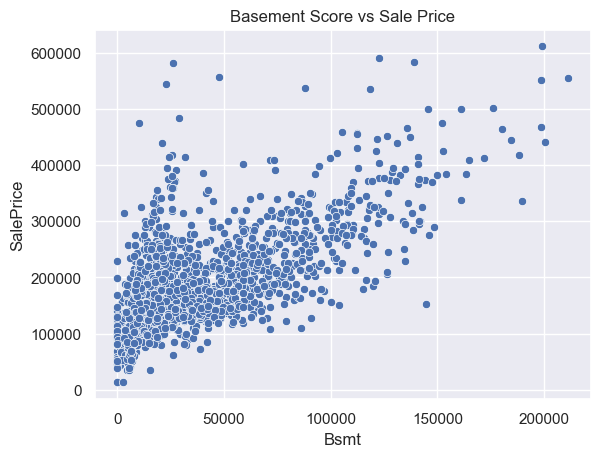

In [185]:
sns.scatterplot(x=hse_rc_encoded['Bsmt'],y=hse_rc_encoded['SalePrice'])
plt.title("Basement Score vs Sale Price")

Since the Basement Finishes have been coded to follow and Ordinal Order, thus 'Bsmt Unf SF' by the order would have a value of 1. We then multiply it with Quality and Condition to give it an overall score of the Basement.

#### Garage

Garage Finish * Garage Qual * Garage Cond * Garage Area

In [186]:
(hse_rc_encoded['Garage Finish'] * hse_rc_encoded['Garage Qual'] + 
hse_rc_encoded['Garage Cond'] * hse_rc_encoded['Garage Area']).corr(hse_rc_encoded['SalePrice'])

0.6576866166391989

In [187]:
hse_rc_encoded['Garage'] = (hse_rc_encoded['Garage Finish']*hse_rc_encoded['Garage Qual'] * 
                           hse_rc_encoded['Garage Cond']*hse_rc_encoded['Garage Area'])
hse_rc_encoded = hse_rc_encoded.drop(['Garage Finish','Garage Qual','Garage Cond', 
                                      'Garage Cars','Garage Area'],axis=1)

Text(0.5, 1.0, 'Garage Score vs Sale Price')

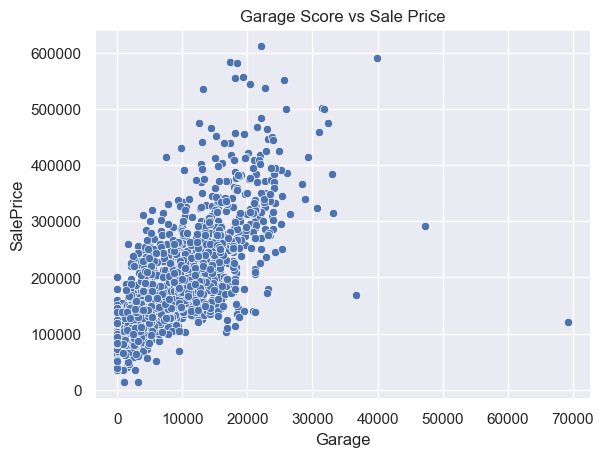

In [188]:
sns.scatterplot(x=hse_rc_encoded['Garage'],y=hse_rc_encoded['SalePrice'])
plt.title("Garage Score vs Sale Price")

In [189]:
hse_rc_encoded[hse_rc_encoded['Garage'] > 40000]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
412   1549  910203020           30        RM          71.0      6900   Pave   
1293  1028  527357180           60        RL          60.0     12511   Pave   

     Alley  Lot Shape Land Contour  ...  Misc Val Mo Sold  Yr Sold Sale Type  \
412   None          3          Lvl  ...         0       2     2008       WD    
1293  None          2          Lvl  ...         0      12     2008       WD    

     SalePrice Overall AboveArea TotalBath     Bsmt   Garage  
412     120500      30     778.0       1.0  23418.0  69300.0  
1293    292500      49    2840.0       3.0  64464.0  47304.0  

[2 rows x 63 columns]

In [190]:
hse_rc_encoded.drop([412,1293],axis = 0, inplace = True)

In [191]:
hse_rc_encoded[hse_rc_encoded['Garage'] > 40000]

Empty DataFrame
Columns: [Id, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Exposure, Heating, Heating QC, Central Air, Electrical, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, SalePrice, Overall, AboveArea, TotalBath, Bsmt, Garage]
Index: []

[0 rows x 63 columns]

- We observe from the plot above that there are two points having higher values of Garage. These are considered outlier points and will be removed.
- Since Garage Cars and Garage Area mesures the area of the garage, we can drop either of them. In this case 'Garage Cars' will be dropped.
- The combination of 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Garage Area', creates a single variable called Garage Score.

#### Outdoor

Wood Deck SF + Open Porch SF + Enclosed Porch + 3Ssn Porch + Screen Porch

In [192]:
(hse_rc_encoded['Wood Deck SF'] + hse_rc_encoded['Open Porch SF'] + 
hse_rc_encoded['Enclosed Porch'] + hse_rc_encoded['3Ssn Porch'] + 
hse_rc_encoded['Screen Porch']).corr(hse_rc_encoded['SalePrice'])

0.4098514924039903

In [193]:
hse_rc_encoded['Outdoor'] = (hse_rc_encoded['Wood Deck SF'] + hse_rc_encoded['Open Porch SF'] 
                             + hse_rc_encoded['Enclosed Porch'] + hse_rc_encoded['3Ssn Porch'] 
                             + hse_rc_encoded['Screen Porch'])
hse_rc_encoded = hse_rc_encoded.drop(['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch',
                                     'Screen Porch'],axis=1)

Text(0.5, 1.0, 'Outdoor Area vs Sale Price')

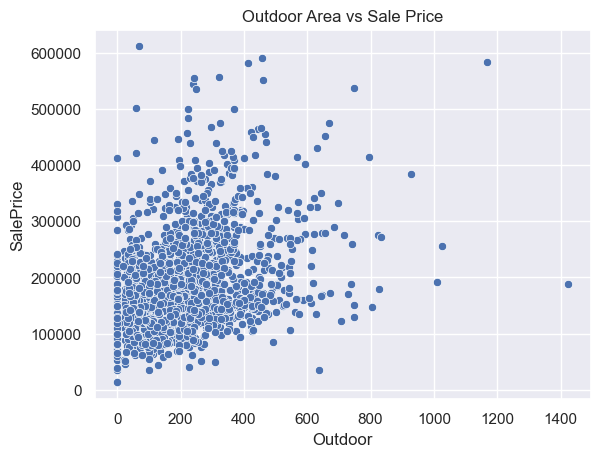

In [194]:
sns.scatterplot(x=hse_rc_encoded['Outdoor'],y=hse_rc_encoded['SalePrice'])
plt.title("Outdoor Area vs Sale Price")

The combination of 'Wood Deck SF' 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch' and 'Screen Porch' provides the Outdoor Area of the property.

#### Age

The age of the house shall be recomputed by using 'Yr Sold' - 'Year Built'.

In [195]:
(hse_rc_encoded['Yr Sold'] - hse_rc_encoded['Year Built'] ).corr(hse_rc_encoded['SalePrice'])

-0.5725797742043169

In [196]:
hse_rc_encoded['Age'] = (hse_rc_encoded['Yr Sold'] - hse_rc_encoded['Year Built'])
hse_rc_encoded = hse_rc_encoded.drop(['Year Built'],axis=1)

The years since remodelling, additions or constructed can be taken into account by taking 'Yr Sold' - 'Year Remod/Add'

In [197]:
(hse_rc_encoded['Yr Sold'] - hse_rc_encoded['Year Remod/Add'] ).corr(hse_rc_encoded['SalePrice'])

-0.5519245903506932

In [198]:
hse_rc_encoded['Remod/Add Age'] = (hse_rc_encoded['Yr Sold'] - hse_rc_encoded['Year Remod/Add'])
hse_rc_encoded = hse_rc_encoded.drop(['Year Remod/Add'],axis=1)

In [199]:
(hse_rc_encoded['Garage Yr Blt']).corr(hse_rc_encoded['SalePrice'])

0.258893238904782

Text(0.5, 1.0, 'Garage Year Built vs Sale Price')

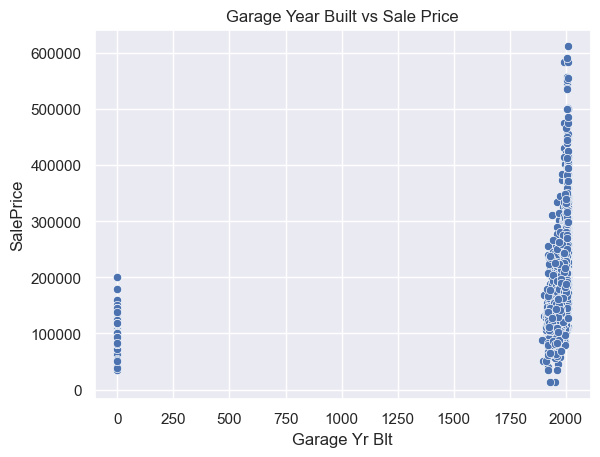

In [200]:
sns.scatterplot(x=hse_rc_encoded['Garage Yr Blt'],y=hse_rc_encoded['SalePrice'])
plt.title("Garage Year Built vs Sale Price")

From the Garage Score we have computed earlier takes into account of the size of the 'Garage Area' it would not be wise to have another penalty term for Garage Yr Blt = 0. Thus this variable shall be dropped.

In [201]:
hse_rc_encoded = hse_rc_encoded.drop(['Garage Yr Blt'],axis=1)

'Yr Sold' and 'Mo Sold' shall be changed to categorical variables. This is due to in economic crisis years, house prices could be lower.

### Features that have more than 80% on a single variable that has not yet been combined during feature engineering

In [202]:
hse_rc['Alley'].value_counts()/len(hse_rc)*100

None    93.150685
Grvl     4.158513
Pave     2.690802
Name: Alley, dtype: float64

In [203]:
hse_rc['Land Contour'].value_counts()/len(hse_rc)*100

Lvl    89.872798
HLS     4.109589
Bnk     3.913894
Low     2.103718
Name: Land Contour, dtype: float64

In [204]:
hse_rc['Utilities'].value_counts()/len(hse_rc)*100

AllPub    99.902153
NoSeWa     0.048924
NoSewr     0.048924
Name: Utilities, dtype: float64

In [205]:
hse_rc['Land Slope'].value_counts()/len(hse_rc)*100

Gtl    95.205479
Mod     4.305284
Sev     0.489237
Name: Land Slope, dtype: float64

In [206]:
hse_rc['Condition 1'].value_counts()/len(hse_rc)*100

Norm      86.154599
Feedr      5.283757
Artery     3.424658
RRAn       1.761252
PosN       1.320939
RRAe       1.027397
PosA       0.587084
RRNn       0.293542
RRNe       0.146771
Name: Condition 1, dtype: float64

In [207]:
hse_rc['Condition 2'].value_counts()/len(hse_rc)*100

Norm      98.727984
Feedr      0.538160
Artery     0.244618
PosA       0.146771
PosN       0.146771
RRNn       0.097847
RRAe       0.048924
RRAn       0.048924
Name: Condition 2, dtype: float64

In [208]:
hse_rc['Bldg Type'].value_counts()/len(hse_rc)*100

1Fam      82.827789
TwnhsE     7.876712
Duplex     3.669276
Twnhs      3.375734
2fmCon     2.250489
Name: Bldg Type, dtype: float64

In [209]:
hse_rc['Exter Cond'].value_counts()/len(hse_rc)*100

TA    86.643836
Gd    10.518591
Fa     2.397260
Ex     0.342466
Po     0.097847
Name: Exter Cond, dtype: float64

In [210]:
hse_rc['Heating'].value_counts()/len(hse_rc)*100

GasA    98.385519
GasW     0.978474
Wall     0.293542
Grav     0.244618
OthW     0.097847
Name: Heating, dtype: float64

In [211]:
hse_rc['Central Air'].value_counts()/len(hse_rc)*100

Y    93.101761
N     6.898239
Name: Central Air, dtype: float64

In [212]:
hse_rc['Electrical'].value_counts()/len(hse_rc)*100

SBrkr    91.095890
FuseA     6.800391
FuseF     1.712329
FuseP     0.342466
Mix       0.048924
Name: Electrical, dtype: float64

In [213]:
hse_rc['Functional'].value_counts()/len(hse_rc)*100

Typ     93.346380
Min2     2.054795
Min1     2.054795
Mod      1.418787
Maj1     0.587084
Maj2     0.342466
Sev      0.097847
Sal      0.097847
Name: Functional, dtype: float64

In [214]:
hse_rc['Paved Drive'].value_counts()/len(hse_rc)*100

Y    90.704501
N     7.387476
P     1.908023
Name: Paved Drive, dtype: float64

In [215]:
hse_rc['Pool QC'].value_counts()/len(hse_rc)*100

None    99.559687
Gd       0.195695
Fa       0.097847
TA       0.097847
Ex       0.048924
Name: Pool QC, dtype: float64

In [216]:
hse_rc['Fence'].value_counts()/len(hse_rc)*100

None     80.528376
MnPrv    11.007828
GdPrv     4.060665
GdWo      3.913894
MnWw      0.489237
Name: Fence, dtype: float64

In [217]:
hse_rc['Misc Feature'].value_counts()/len(hse_rc)*100

None    96.819961
Shed     2.739726
Gar2     0.195695
Othr     0.146771
TenC     0.048924
Elev     0.048924
Name: Misc Feature, dtype: float64

In [218]:
hse_rc['Sale Type'].value_counts()/len(hse_rc)*100

WD       86.937378
New       7.729941
COD       3.082192
ConLD     0.782779
CWD       0.489237
ConLI     0.342466
ConLw     0.244618
Con       0.195695
Oth       0.195695
Name: Sale Type, dtype: float64

- Drop columns: Alley, Land Contour, Utilities, Land Slope, Condition 1, Condition 2, Bldg Type, Exter Cond, Heating, Central Air, Electrical, Functional, Paved Drive, Pool QC, Fence, Misc Feature, Sale Type
- Since these columns have more than 80% of a single feature, there will not be much variation to the sale price.

In [219]:
# Categorical variables to dummify
hse_rc2_dumb = pd.get_dummies(hse_rc_encoded, columns=['MS SubClass','MS Zoning', 'Street', 
                                                       'Lot Config',  'Neighborhood', 'House Style', 
                                                       'Roof Style', 'Roof Matl','Exterior 1st', 
                                                       'Exterior 2nd', 'Mas Vnr Type',
                                                       'Foundation','Garage Type','Yr Sold','Mo Sold',], 
                              drop_first= True)

In [220]:
X2 = hse_rc2_dumb.drop(['Id','PID','Alley','Land Contour','Utilities','Land Slope', 
                        'Condition 1','Condition 2','Bldg Type','Exter Cond', 
                        'Heating','Central Air','Electrical','Functional',
                        'Paved Drive','Pool QC','Fence','Misc Feature','Sale Type','SalePrice'], axis =1)
y2 = hse_rc2_dumb['SalePrice']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (2040, 149)
y2: (2040,)


In [221]:
hse_rc2_dumb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2040 entries, 0 to 2050
Columns: 169 entries, Id to Mo Sold_12
dtypes: float64(6), int32(14), int64(14), object(9), uint8(126)
memory usage: 840.7+ KB


## Train Test Split the data

In [222]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 123)

## Scaling & Modeling the data

In [223]:
ss = StandardScaler()
X_ss_train2 = ss.fit_transform(X_train2)
X_ss_test2 = ss.transform(X_test2)
ss_X_train_df2 = pd.DataFrame(X_ss_train2, columns = X_train2.columns)
ss_X_test_df2 = pd.DataFrame(X_ss_test2, columns = X_test2.columns)

In [224]:
ss_X_train_df2

Lot Frontage  Lot Area  Lot Shape  Mas Vnr Area  Exter Qual  \
0        -1.251833 -0.819701  -1.047272     -0.568862    1.010401   
1        -0.050796 -0.255412  -1.047272     -0.077270   -0.695905   
2        -0.451142 -0.114160   0.711593     -0.568862   -0.695905   
3        -0.651315 -0.537629   0.711593     -0.568862   -0.695905   
4         1.150242  0.818393   0.711593      0.917348    1.010401   
...            ...       ...        ...           ...         ...   
1525      3.402189  0.321704  -4.565004      0.254270    1.010401   
1526     -1.351920 -0.892489  -1.047272     -0.568862    1.010401   
1527      0.149377  0.312912  -1.047272     -0.568862   -0.695905   
1528     -0.351055 -0.042093   0.711593     -0.568862   -0.695905   
1529     -0.351055  0.644134  -1.047272     -0.568862    1.010401   

      Bsmt Exposure  Heating QC  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0          1.253973    0.879596      -1.038383      -0.194078      2.255387   
1          0.331579   -0.166891       0.222511      -0.194078     -0.784915   
2         -0.590814    0.879596       1.483405      -0.194078     -0.784915   
3         -0.590814   -0.166891      -1.038383      -0.194078     -0.784915   
4          2.176366    0.879596      -1.038383      -0.194078      0.735236   
...             ...         ...            ...            ...           ...   
1525      -0.590814    0.879596      -1.038383      -0.194078      0.735236   
1526       2.176366   -1.213378      -2.299277      -0.194078      0.735236   
1527       1.253973   -0.166891       0.222511      -0.194078     -0.784915   
1528      -0.590814   -1.213378       1.483405      -0.194078     -0.784915   
1529      -0.590814    0.879596       2.744298      -0.194078      0.735236   

      ...  Mo Sold_3  Mo Sold_4  Mo Sold_5  Mo Sold_6  Mo Sold_7  Mo Sold_8  \
0     ...  -0.299572  -0.338154  -0.373149  -0.448265  -0.406535  -0.309820   
1     ...  -0.299572  -0.338154  -0.373149  -0.448265  -0.406535   3.227679   
2     ...  -0.299572   2.957232  -0.373149  -0.448265  -0.406535  -0.309820   
3     ...  -0.299572  -0.338154   2.679891  -0.448265  -0.406535  -0.309820   
4     ...  -0.299572  -0.338154  -0.373149   2.230821  -0.406535  -0.309820   
...   ...        ...        ...        ...        ...        ...        ...   
1525  ...  -0.299572  -0.338154  -0.373149   2.230821  -0.406535  -0.309820   
1526  ...  -0.299572  -0.338154  -0.373149  -0.448265  -0.406535  -0.309820   
1527  ...  -0.299572  -0.338154  -0.373149  -0.448265  -0.406535  -0.309820   
1528  ...   3.338092  -0.338154  -0.373149  -0.448265  -0.406535  -0.309820   
1529  ...  -0.299572  -0.338154  -0.373149  -0.448265  -0.406535  -0.309820   

      Mo Sold_9  Mo Sold_10  Mo Sold_11  Mo Sold_12  
0      4.072617   -0.254398   -0.223837   -0.194915  
1     -0.245542   -0.254398   -0.223837   -0.194915  
2     -0.245542   -0.254398   -0.223837   -0.194915  
3     -0.245542   -0.254398   -0.223837   -0.194915  
4     -0.245542   -0.254398   -0.223837   -0.194915  
...         ...         ...         ...         ...  
1525  -0.245542   -0.254398   -0.223837   -0.194915  
1526  -0.245542   -0.254398   -0.223837   -0.194915  
1527  -0.245542   -0.254398   -0.223837   -0.194915  
1528  -0.245542   -0.254398   -0.223837   -0.194915  
1529  -0.245542   -0.254398    4.467539   -0.194915  

[1530 rows x 149 columns]

### Linear Regression Model

In [225]:
lr2 = LinearRegression()
lr2.fit(X_ss_train2,y_train2)
cross_val_score(lr2, X_ss_train2,y_train2, cv=5).mean()

-9.531865942823524e+22

In [226]:
lr2.score(X_ss_train2, y_train2)

0.9290710205751082

In [227]:
y_pred_train_lr2 = lr2.predict(X_ss_test2)

In [228]:
# Checking the R^2 score of LR
metrics.r2_score(y_test2, y_pred_train_lr2)

-2.483943482958687e+23

In [229]:
#Check RMSE of Linear Model
np.sqrt(metrics.mean_squared_error(y_test2, y_pred_train_lr2))

3.731130203218355e+16

### RidgeCV Model

In [230]:
ridge_model2 = Ridge()
ridge_model2.fit(X_ss_train2,y_train2)
r_alphas = np.logspace(0, 5, 100)
ridge_cv2 = RidgeCV(alphas=r_alphas, scoring='r2', cv=5).fit(X_ss_train2,y_train2)
print(ridge_cv2.score(X_ss_train2, y_train2))
print(ridge_cv2.score(X_ss_test2, y_test2))

0.9270564414278261
0.9007777661073061


In [231]:
ridge_cv2.alpha_

58.570208180566674

In [232]:
y_pred_train_ridge2 = ridge_cv2.predict(X_ss_test2)

In [233]:
#Check RMSE of RidgeCV Model
np.sqrt(metrics.mean_squared_error(y_test2, y_pred_train_ridge2))

23581.64242975254

### LassoCV Model

In [234]:
lasso_model2 = Lasso()
lasso_model2.fit(X_ss_train,y_train)
l_alphas = np.logspace(-3, 0, 100)
lasso_cv2 = LassoCV(alphas=l_alphas, cv=5, max_iter=50000).fit(X_ss_train2, y_train2)
print(lasso_cv2.alpha_)
print(lasso_cv2.score(X_ss_train2, y_train2))
print(lasso_cv2.score(X_ss_test2, y_test2))

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.473e+11, tolerance: 9.942e+08
  model = cd_fast.enet_coordinate_descent(


1.0
0.9290689608697282
0.8910362352575143


In [235]:
y_pred_train_lasso2 = lasso_cv2.predict(X_ss_test2)
np.sqrt(metrics.mean_squared_error(y_test2, y_pred_train_lasso2))

24712.153874680236

In [236]:
pd.Series(lasso_cv2.coef_,X_train2.columns).sort_values(ascending=False).head(20)

AboveArea               27665.115648
MS Zoning_RL            18646.963120
Mas Vnr Type_None       14879.459080
Bsmt                    14854.907775
MS Zoning_FV            13049.856343
MS Zoning_RM            12198.135833
Mas Vnr Type_BrkFace    10734.628872
Overall                 10537.314031
Mas Vnr Type_Stone       8511.605188
Garage                   7332.749595
Mas Vnr Area             6661.118346
Garage Type_Detchd       6094.685527
Bsmt Exposure            5945.640576
Neighborhood_StoneBr     5783.983865
Exter Qual               5487.081912
Roof Style_Hip           5132.920878
Neighborhood_NridgHt     4887.826776
Exterior 2nd_VinylSd     4775.373219
MS Zoning_RH             4480.651762
Lot Area                 4233.623517
dtype: float64

In [237]:
LassoSeries2 = pd.Series(lasso_cv2.coef_,X_train2.columns).sort_values(ascending=False)

In [238]:
LassoSeries2[LassoSeries2 == 0]

MS SubClass_150    0.0
dtype: float64

Only 1 of the coefficient has the value 0. This means that any changes in the remaining variables would have changes in the response.

### ElasticNetCV Model

In [239]:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_l1_ratio = np.linspace(0.1, 1.0, 100)
enet_model2 = ElasticNetCV(alphas=enet_alphas, cv=5, l1_ratio = enet_l1_ratio)
enet_model2 = enet_model.fit(X_ss_train2, y_train2)
print(enet_model2.score(X_ss_train2, y_train2))
print(enet_model2.score(X_ss_test2, y_test2))
print(enet_model2.alpha_)
enet_model2.l1_ratio_

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121222393414.84656, tolerance: 772935961.1405292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23953757380.537537, tolerance: 772935961.1405292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2116300525.6071777, tolerance: 772935961.1405292
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packa

0.9267161506231819
0.9015546359572242
0.9797979797979799


0.9545454545454545

In [311]:
abs(pd.Series(enet_model2.coef_,X_train2.columns).sort_values(ascending=False)).head(20)

AboveArea               21880.976548
Bsmt                    13946.597518
Overall                  9682.613900
Garage                   7939.679517
Neighborhood_NridgHt     7163.074594
Neighborhood_StoneBr     7133.940302
Mas Vnr Area             6518.874416
Exter Qual               6201.589175
Bsmt Exposure            6169.219802
Kitchen Qual             4816.434259
Lot Area                 4068.613634
TotRms AbvGrd            4024.484529
Mas Vnr Type_None        3992.123485
Lot Frontage             3887.991034
Neighborhood_GrnHill     3686.942765
Exterior 1st_BrkFace     3257.881777
MS Zoning_FV             2896.434568
Lot Config_CulDSac       2761.077425
Neighborhood_BrDale      2622.262585
Mas Vnr Type_Stone       2394.367122
dtype: float64

In [241]:
y_pred_train_enet2 = enet_model2.predict(X_ss_test2)
np.sqrt(metrics.mean_squared_error(y_test2, y_pred_train_enet2))

23489.143668890996

**Summary of Scores of Model**

|Base Model | R^2 - Train| R^2 - Test |RMSE|Alpha|L1|
|---|---|---|---|---|---|
|Linear Regression|0.928 |-4.95e+23|5.27e+16|-|-|
|RidgeCV|0.927|0.901|23581.64|58.57|-|
|LassoCV|0.929|0.891|24712.15|1|-|
|ElasticCV|0.926|0.901|23489.14|0.980|0.955|

Linear Regression model did not work in our modelling case due to no regulariation in this model and due to the large number of features (134 variables) which is able to penalise the variables that distortes the linearlity.  
Thus we will evaluate using the other 3 Models (RidgeCV, LassoCV and ElasticCV) have rather similar metric scores, we will use all 3 for our Actual Data.

# Actual Data

In [242]:
#Importing the test data
hse_test = pd.read_csv('datasets/test.csv')
print(hse_test.shape)
hse_test.head()

(878, 80)


Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [243]:
hse_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

## Preliminary Cleaning - Test Data

'Missing datas' in columns
1. 'Lot Frontage'
2. 'Alley', 
3. 'Mas Vnr Type', 
4. 'Mas Vnr Area'
5. 'Bsmt Qual'
6. 'Bsmt Cond'
7. 'Bsmt Exposure'
8. 'BsmtFin Type 1'
9. 'BsmtFin Type 2'
10. 'Electrical'
11. 'Fireplace Qu'
12. 'Garage Type'
13. 'Garage Yr Blt'
14. 'Garage Finish'
15. 'Garage Qual'
16. 'Garage Cond'
17. 'Pool QC'
18. 'Fence'
19. 'Misc Feature'

In [244]:
hse_test['Alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [245]:
hse_test['Mas Vnr Type'].isna().sort_values(ascending=False)

865     True
0      False
589    False
578    False
579    False
       ...  
296    False
297    False
298    False
299    False
877    False
Name: Mas Vnr Type, Length: 878, dtype: bool

In [246]:
hse_test['Mas Vnr Area'].isna().sort_values(ascending=False)

865     True
0      False
589    False
578    False
579    False
       ...  
296    False
297    False
298    False
299    False
877    False
Name: Mas Vnr Area, Length: 878, dtype: bool

In [247]:
hse_test.iloc[865].isna()

Id              False
PID             False
MS SubClass     False
MS Zoning       False
Lot Frontage    False
                ...  
Misc Feature     True
Misc Val        False
Mo Sold         False
Yr Sold         False
Sale Type       False
Name: 865, Length: 80, dtype: bool

In [248]:
hse_test['Bsmt Qual'].unique()

array(['Fa', 'Gd', 'TA', 'Ex', nan, 'Po'], dtype=object)

In [249]:
hse_test['Bsmt Cond'].unique()

array(['TA', 'Gd', nan, 'Fa'], dtype=object)

In [250]:
hse_test['Bsmt Cond'].isna().sum()

25

In [251]:
hse_test['Bsmt Exposure'].unique()

array(['No', 'Av', nan, 'Mn', 'Gd'], dtype=object)

In [252]:
hse_test['BsmtFin Type 1'].unique()

array(['Unf', 'GLQ', 'BLQ', 'Rec', 'ALQ', nan, 'LwQ'], dtype=object)

In [253]:
hse_test['BsmtFin Type 2'].unique()

array(['Unf', 'LwQ', nan, 'ALQ', 'GLQ', 'Rec', 'BLQ'], dtype=object)

In [254]:
hse_test['Electrical'].isna().sort_values(ascending=False)

634     True
0      False
576    False
578    False
579    False
       ...  
296    False
297    False
298    False
299    False
877    False
Name: Electrical, Length: 878, dtype: bool

In [255]:
hse_test.iloc[634]

Id                   1578
PID             916386080
MS SubClass            80
MS Zoning              RL
Lot Frontage         73.0
                  ...    
Misc Feature          NaN
Misc Val                0
Mo Sold                 5
Yr Sold              2008
Sale Type             WD 
Name: 634, Length: 80, dtype: object

In [256]:
hse_test['Fireplace Qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [257]:
hse_test['Garage Type'].unique()

array(['Detchd', 'Attchd', 'BuiltIn', nan, '2Types', 'CarPort', 'Basment'],
      dtype=object)

In [258]:
hse_test['Garage Finish'].isna().sort_values(ascending=False)

555     True
615     True
482     True
629     True
779     True
       ...  
303    False
304    False
306    False
307    False
877    False
Name: Garage Finish, Length: 878, dtype: bool

In [259]:
hse_test['Pool QC'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

##### Check that all the years values are within range

In [260]:
hse_test['Year Built'].sort_values().unique()

array([1880, 1882, 1885, 1890, 1892, 1900, 1902, 1904, 1905, 1906, 1907,
       1908, 1910, 1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1930, 1931, 1932, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [261]:
hse_test['Year Remod/Add'].sort_values().unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010], dtype=int64)

In [262]:
hse_test['Garage Yr Blt'].sort_values().unique()

array([1900., 1906., 1908., 1910., 1915., 1916., 1917., 1918., 1920.,
       1921., 1922., 1923., 1924., 1925., 1926., 1927., 1928., 1930.,
       1931., 1932., 1934., 1935., 1937., 1938., 1939., 1940., 1941.,
       1943., 1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953.,
       1954., 1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971.,
       1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010.,   nan])

In [263]:
hse_test['Yr Sold'].sort_values().unique()

array([2006, 2007, 2008, 2009, 2010], dtype=int64)

In [264]:
hse_test[(hse_test['Garage Yr Blt'].isna()) & (hse_test['Garage Area'] !=0)][['Garage Yr Blt',
                                                                             'Garage Area','Garage Type',
                                                                             'Year Built', 
                                                                              'Year Remod/Add']]

Garage Yr Blt  Garage Area Garage Type  Year Built  Year Remod/Add
764            NaN          360      Detchd        1910            1983

In [265]:
hse_test[(hse_test['Garage Type'] == 'Detchd') & (hse_test['Garage Area'] !=0)][['Garage Type',
                                                                                 'Garage Finish',
                                                                                 'Garage Qual',
                                                                                 'Garage Cond']].value_counts()

Garage Type  Garage Finish  Garage Qual  Garage Cond
Detchd       Unf            TA           TA             169
                            Fa           TA              21
                                         Fa              12
             Fin            TA           TA              11
             Unf            TA           Fa              11
             RFn            TA           TA              10
             Unf            Fa           Po               4
                            Po           Po               2
                            TA           Gd               2
             Fin            Gd           Ex               1
             Unf            Gd           TA               1
                            Po           Fa               1
dtype: int64

Since there is no way of knowing which year the Garage was built, we assume that it was done during remodeling. Remaning 'Garage Finish', 'Garage Qual', 'Garage Cond' shall follow using Mode of similar 'Garage Type'

In [266]:
hse_test['Garage Yr Blt'].iloc[764] = 1983

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\966170969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_test['Garage Yr Blt'].iloc[764] = 1983


In [267]:
hse_test['Garage Finish'].iloc[764] = 'Unf'

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\1078616302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_test['Garage Finish'].iloc[764] = 'Unf'


In [268]:
hse_test['Garage Qual'].iloc[764] = 'TA'

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\1891651334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_test['Garage Qual'].iloc[764] = 'TA'


In [269]:
hse_test['Garage Cond'].iloc[764] = 'TA'

C:\Users\calerlime\AppData\Local\Temp\ipykernel_11144\3110064296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hse_test['Garage Cond'].iloc[764] = 'TA'


|No.| Columns with Missing Data | Remedy |Reason|
|---|---|---|---|
|1.|Lot Frontage| Imputation using Mode| Rebuilding of Data|
|2.|Alley| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Alley'|
|3.|Mas Vnr Type| Using SimpleImpute - Mode for Row #864| Variable is not normally distributed|
|4.|Mas Vnr Area| Using SimpleImpute - Mode for Row #864| Variable is not normally distributed|
|5.|Bsmt Qual| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|6.|Bsmt Cond| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|7.|Bsmt Exposure| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|8.|BsmtFin Type 1| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|9.|BsmtFin Type 2| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Basement'|
|10.|Electrical| Using SimpleImputing - Mode for Row #634| Missing Data - 1 Row|
|11.|Fireplace Qu| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Fireplace'|
|12.|Garage Type| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Garage'|
|13.|Garage Yr Blt|Missing Data are all '0' + For Row #764 use 1983|As Per Dataset Description, 0 means 'No Garage' + Assume that Year the house remodeled is Year Garage was built|
|14.|Garage Finish| Renaming from 'NA' to 'None', For Row #764 use 'Unf' |As Per Dataset Description, NA means 'No Garage', Use Mode with similar garage type|
|15.|Garage Qual| Renaming from 'NA' to 'None' + For Row #764 use 'TA' |As Per Dataset Description, NA means 'No Garage', Use Mode with similar garage type|
|16.|Garage Cond| Renaming from 'NA' to 'None' + For Row #764 use 'TA'|As Per Dataset Description, NA means 'No Garage', Use Mode with similar garage type|
|17.|Pool QC| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Pool'|
|18.|Fence| Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Fence'|
|19.|Misc Feature|Renaming from 'NA' to 'None'|As Per Dataset Description, NA means 'No Misc Feature'|

## Data Cleaning - Test Data

### Using SimpleImputing: Method 'Mode' to impute missing datas

In [270]:
hse_test['Lot Frontage'] = imp_LotFrontage.transform(hse_test['Lot Frontage'].values.reshape(-1,1))[:,0]

In [271]:
hse_test['Mas Vnr Type'] = imp_MasVnrType.transform(hse_test['Mas Vnr Type'].values.reshape(-1,1))[:,0]

In [272]:
hse_test['Mas Vnr Area'] = imp_MasVnrArea.transform(hse_test['Mas Vnr Area'].values.reshape(-1,1))[:,0]

In [273]:
hse_test['Electrical'] = imp_Electrical.transform(hse_test['Electrical'].values.reshape(-1,1))[:,0]

### Filling in the NaN columns

In [274]:
# Filling in all the NaN for the following columns
hse_test_rc = hse_test.fillna({'Alley':'None', 
                               'Bsmt Qual':'None',
                               'Bsmt Cond':'None',
                               'Bsmt Exposure':'None',
                               'BsmtFin Type 1':'None',
                               'BsmtFin Type 2':'None',
                               'Fireplace Qu':'None',
                               'Garage Type':'None',
                               'Garage Yr Blt':0,
                               'Garage Finish':'None',
                               'Garage Qual':'None',
                               'Garage Cond':'None',
                               'Pool QC':'None',
                               'Fence':'None',
                               'Misc Feature':'None',
                              })

In [275]:
hse_test_rc.isna().sum().sort_values(ascending=False)

Id              0
PID             0
Fireplace Qu    0
Fireplaces      0
Functional      0
               ..
Exterior 2nd    0
Exterior 1st    0
Roof Matl       0
Roof Style      0
Sale Type       0
Length: 80, dtype: int64

### OrdinalEncoding for the Ordinal Columns

In [276]:
# Using OrdinalEncoder to encode and map the ordinal columns
hse_test_rc_end = encoder.transform(hse_test_rc)

### Feature Engineering for Test data

In [277]:
hse_test_rc_end['Overall'] = hse_test_rc_end['Overall Qual'] * hse_test_rc_end['Overall Cond']
hse_test_rc_end = hse_test_rc_end.drop(['Overall Qual','Overall Cond'],axis=1)

In [278]:
hse_test_rc_end['AboveArea'] = (hse_test_rc_end['1st Flr SF']+ hse_test_rc_end['2nd Flr SF'] 
                            + 0.5*hse_test_rc_end['Low Qual Fin SF'])
hse_test_rc_end = hse_test_rc_end.drop(['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area'],axis=1)

In [279]:
hse_test_rc_end['TotalBath'] = (hse_test_rc_end['Bsmt Full Bath']+ 0.5*hse_test_rc_end['Bsmt Half Bath'] + 
                              hse_test_rc_end['Full Bath'] + 0.5*hse_test_rc_end['Half Bath'])
hse_test_rc_end = hse_test_rc_end.drop(['Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath'],axis=1)

In [280]:
hse_test_rc_end['Bsmt'] = ((hse_test_rc_end['BsmtFin Type 1'] * hse_test_rc_end['BsmtFin SF 1'] + 
                         hse_test_rc_end['BsmtFin Type 2'] * hse_test_rc_end['BsmtFin SF 2'] +
                         hse_test_rc_end['Bsmt Unf SF'])*hse_test_rc_end['Bsmt Qual']*
                         hse_test_rc_end['Bsmt Cond'] )
hse_test_rc_end = hse_test_rc_end.drop(['BsmtFin Type 1','BsmtFin SF 1','BsmtFin Type 2',
                                      'BsmtFin SF 2','Bsmt Unf SF','Bsmt Qual',
                                      'Bsmt Cond','Total Bsmt SF'],axis=1)

In [281]:
hse_test_rc_end['Garage'] = (hse_test_rc_end['Garage Finish']*hse_test_rc_end['Garage Qual'] * 
                           hse_test_rc_end['Garage Cond']*hse_test_rc_end['Garage Area'])
hse_test_rc_end = hse_test_rc_end.drop(['Garage Finish','Garage Qual','Garage Cond', 
                                      'Garage Cars','Garage Area'],axis=1)

In [282]:
hse_test_rc_end['Outdoor'] = (hse_test_rc_end['Wood Deck SF'] + hse_test_rc_end['Open Porch SF'] 
                             + hse_test_rc_end['Enclosed Porch'] + hse_test_rc_end['3Ssn Porch'] 
                             + hse_test_rc_end['Screen Porch'])
hse_test_rc_end = hse_test_rc_end.drop(['Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch',
                                     'Screen Porch'],axis=1)

In [283]:
hse_test_rc_end['Age'] = (hse_test_rc_end['Yr Sold'] - hse_test_rc_end['Year Built'])
hse_test_rc_end = hse_test_rc_end.drop(['Year Built'],axis=1)

In [284]:
hse_test_rc_end['Remod/Add Age'] = (hse_test_rc_end['Yr Sold'] - hse_test_rc_end['Year Remod/Add'])
hse_test_rc_end = hse_test_rc_end.drop(['Year Remod/Add'],axis=1)

In [285]:
hse_test_rc_end = hse_test_rc_end.drop(['Garage Yr Blt'],axis=1)

### Dummify the Nominal Columns 

In [286]:
# Categorical variables to do encoding
hse_test_rc_dumb = pd.get_dummies(hse_test_rc_end, columns=['MS SubClass','MS Zoning', 'Street', 
                                                            'Lot Config',  'Neighborhood', 'House Style',
                                                            'Roof Style', 'Roof Matl','Exterior 1st', 
                                                            'Exterior 2nd', 'Mas Vnr Type','Foundation',
                                                            'Garage Type','Mo Sold','Yr Sold'
                                                           ], drop_first= True)

### Drop the Columns with Identifier and Variables with >80% single type

In [287]:
hse_test_rc2 = hse_test_rc_dumb.drop(['Id','PID','Alley','Land Contour','Utilities',
                                      'Land Slope', 'Condition 1','Condition 2','Bldg Type','Exter Cond', 
                                      'Heating','Central Air','Electrical','Functional','Paved Drive',
                                      'Pool QC','Fence','Misc Feature','Sale Type'], axis =1)

In [288]:
hse_test_rc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Columns: 146 entries, Lot Frontage to Yr Sold_2010
dtypes: float64(4), int32(6), int64(13), uint8(123)
memory usage: 242.8 KB


### Scaling the Test-data

In [289]:
#Ensure that the test dataset has the same number of columns 
hse_test_rc_ind = hse_test_rc2.reindex(labels=X_train2.columns,axis=1)

In [290]:
hse_test_rc_ind.shape

(878, 149)

In [291]:
hse_test_rc_ind.isna().sum().sort_values(ascending=False)

MS Zoning_C (all)       878
Roof Matl_Membran       878
Exterior 1st_ImStucc    878
Neighborhood_GrnHill    878
Neighborhood_Landmrk    878
                       ... 
Neighborhood_BrkSide      0
Neighborhood_ClearCr      0
Neighborhood_CollgCr      0
Neighborhood_Crawfor      0
Mo Sold_12                0
Length: 149, dtype: int64

In [292]:
# Filling '0' for all NaN since the all categorical variables have been dummified (1 or 0). Since the
# columns were not there, meaning the values are all '0'
hse_test_rc_ind = hse_test_rc_ind.fillna(value=0)

In [293]:
hse_test_rc_ind.isna().sum().sort_values(ascending=False)

Lot Frontage            0
Exterior 1st_BrkFace    0
Exterior 1st_CemntBd    0
Exterior 1st_HdBoard    0
Exterior 1st_ImStucc    0
                       ..
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Mo Sold_12              0
Length: 149, dtype: int64

In [294]:
# Scaling using transform on the test dataset
X_sst_test = ss.transform(hse_test_rc_ind)
sst_X_test_df = pd.DataFrame(X_sst_test, columns = hse_test_rc_ind.columns)

In [295]:
hse_test_rc_ind.shape

(878, 149)

#### Predict Using RidgeCV Model

In [296]:
# Predict using RidgeCV Model
y_pred_ridge = ridge_cv2.predict(sst_X_test_df)

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


In [297]:
# Output from RidgeCV Model
output_ridge = hse_test_rc[['Id']].copy()
output_ridge['SalePrice'] = y_pred_ridge
output_ridge.set_index(output_ridge.columns[0], inplace= True)
output_ridge

SalePrice
Id                 
2658  133617.010492
2718  161542.458900
2414  222315.944804
1989  105821.542532
625   164441.536509
...             ...
1662  172026.304720
1234  220233.221424
1373  119434.063294
1672  107050.084180
1939  112166.779745

[878 rows x 1 columns]

In [298]:
output_ridge.mean()

SalePrice    179375.217461
dtype: float64

In [299]:
output_ridge.to_csv('output_ridge.csv')

Ridge RMSE on test dataset is 27324.50

#### Predict Using LassoCV Model

In [300]:
# Predict using LassoCV Model
y_pred_lasso = lasso_cv2.predict(sst_X_test_df)

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [301]:
# Output from LassoCV Model
output_lasso = hse_test_rc[['Id']].copy()
output_lasso['SalePrice'] = y_pred_lasso
output_lasso.set_index(output_lasso.columns[0], inplace= True)
output_lasso

SalePrice
Id                 
2658  141386.429651
2718  162978.716739
2414  219295.224217
1989  103617.443408
625   162755.827005
...             ...
1662  171173.587997
1234  215196.312059
1373  122948.898648
1672  107881.941137
1939  108622.458400

[878 rows x 1 columns]

In [302]:
output_lasso.mean()

SalePrice    178577.333787
dtype: float64

In [303]:
output_lasso.to_csv('output_lasso.csv')

Lasso RMSE on test dataset = 27092.57

#### Predict Using ElasticNetCV Model 

In [304]:
# Predict using ElasticNetCV Model
y_pred_test_enet2 = enet_model2.predict(sst_X_test_df)

C:\Users\calerlime\.conda\envs\dsi-sg\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(


In [305]:
# Output from ElasticNetCV Model
output_enet = hse_test_rc[['Id']].copy()
output_enet['SalePrice'] = y_pred_test_enet2
output_enet.set_index(output_enet.columns[0], inplace= True)
output_enet

SalePrice
Id                 
2658  133078.027216
2718  161396.353301
2414  222618.515472
1989  105961.586278
625   164624.832803
...             ...
1662  172185.453090
1234  220855.533174
1373  119226.437485
1672  106865.957956
1939  112669.346901

[878 rows x 1 columns]

In [306]:
output_enet.mean()

SalePrice    179423.738404
dtype: float64

ElasticNet RMSE on test dataset = 27409.15

In [307]:
output_enet.to_csv('output_enet.csv')

# Conclusions and Recommendations

## Conclusions

Even though all 3 Regression models have rather similar score, we can use ElasticNetCV in predicting the Sale Prices in Ames as it has the lowest RMSE score of 27409 on the test dataset. 

The most important features of the house in determining the Sale Price by looking at the coefficient from ElasticNetCV is the living area above gound, the neighbourhood, the overall (quality and condition) of the house, the garage (garage finish, garage cars and garage area) combination  and followed by the basement (types of finishes on the basement, the square footage and the quality).

## Recommendations

There are other factors which may affect the Sale Price which are not included in the dataset that might assist are: 

[Source 1](https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp)
[Source 2](https://www.investopedia.com/ask/answers/040215/how-does-law-supply-and-demand-affect-housing-market.asp)
- Economy status: Is the Economy facing a boom or bust
- Interest Rates: Lower interest rates tend to have more buyers (Demand and Supply)
- Demographics: Potential Homebuyers or 2nd Vacation Home, the price of rental in the neighbourhood.
- National and State Policies: Government Subsidies or Tax Incentives to attact more people to stay there.